# Descriptive Analysis

In this section, we will perform a descriptive analysis of the dataset. Descriptive analysis involves summarizing and visualizing the data to understand its main characteristics. This includes exploring the distribution of variables, identifying patterns, and gaining insights that can guide further analysis. 

We will use Python libraries such as `pandas` for data manipulation and `matplotlib` or `seaborn` for visualization. This step is crucial for understanding the structure and quality of the data before proceeding with more advanced analyses.

In [96]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [97]:
def load_data(file_path):
    """
    Load the dataset from a file path
    """
    df = pd.read_csv(file_path)
    print(f"Data loaded with {df.shape[0]} rows and {df.shape[1]} columns")
    return df

# Load data
df = load_data('../../data/cleaned/cleaned_survey_data.csv')

Data loaded with 825 rows and 137 columns


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Columns: 137 entries, timestamp to sos_automobile_None
dtypes: int64(136), object(1)
memory usage: 883.1+ KB


In [99]:
for col in df.columns:
    print(col)



timestamp
peou_navigation_1
peou_navigation_2
peou_learning_1
peou_learning_2
peou_instructions_1
peou_instructions_2
peou_response_1
peou_response_2
peou_error_1
peou_error_2
pu_product_1
pu_product_2
pu_convenience_1
pu_convenience_2
pu_cost_1
pu_cost_2
pu_info_1
pu_info_2
pu_personalization_1
pu_personalization_2
sa_privacy_1
sa_privacy_2
sa_payment_1
sa_payment_2
sa_policy_1
sa_policy_2
si_wom_1
si_wom_2
si_social_media_1
si_social_media_2
si_reviews_1
si_reviews_2
si_social_proof_1
si_social_proof_2
si_normative_1
si_normative_2
si_sharing_1
si_sharing_2
att_positive_1
att_positive_2
risk_security_1
risk_authenticity_1
opi_satisfaction
opi_behavior_change
opi_convenience
opi_value
gecp_
gecp_ali_express
gecp_amazon
gecp_ebay
gecp_instagram_stores
gecp_keels
gecp_lassanacom
gecp_online_clothing_stores
gecp_pickme
gecp_shein
gecp_stronglk
gecp_books_and_electronics
gecp_wishque
gecp_aliexpress
gecp_darazlk
gecp_https:__slbookslk_
gecp_ikmanlk
gecp_kaprukacom
gecp_takaslk
gecp_wowlk


Analysis Gender of the sample

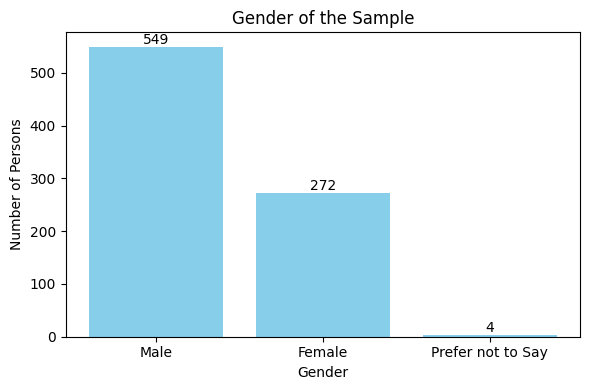

In [100]:
def plot_gender_distribution(df):
    """
    Plots the distribution of encoded gender values from the given DataFrame,
    and displays the exact count on top of each bar.
    Assumes 'gender_encoded' column contains:
        0 - Male
        1 - Female
        2 - Prefer not to Say
    """
    if 'gender_encoded' not in df.columns:
        print("Error: 'gender_encoded' column not found in the DataFrame.")
        return

    # Get value counts sorted by index (to maintain label order)
    counts = df['gender_encoded'].value_counts().sort_index()
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot bar chart
    bars = ax.bar(counts.index, counts.values, color='skyblue')
    
    # Set titles and labels
    ax.set_title("Gender of the Sample")
    ax.set_xlabel("Gender")
    ax.set_ylabel("Number of Persons")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["Male", "Female", "Prefer not to Say"])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height), 
                ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_gender_distribution(df)


Age distribution

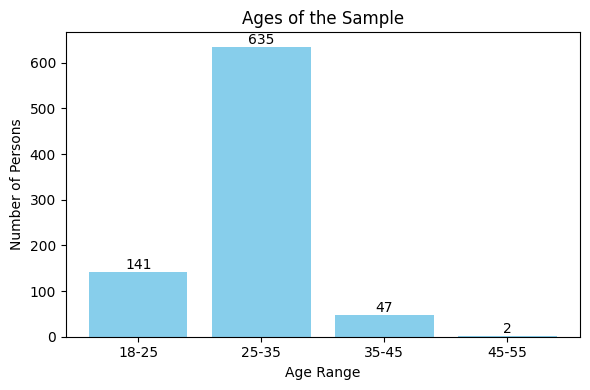

In [101]:
def plot_age_distribution(df):
    """
    Plots the distribution of encoded gender values from the given DataFrame,
    and displays the exact count on top of each bar.
    Assumes 'age_encoded' column contains:
        0 - 18-25
        1 - 25-35
        2 - 35-45
        3 - 45-55
    """
    if 'age_encoded' not in df.columns:
        print("Error: 'age_encoded' column not found in the DataFrame.")
        return

    # Get value counts sorted by index (to maintain label order)
    counts = df['age_encoded'].value_counts().sort_index()
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot bar chart
    bars = ax.bar(counts.index, counts.values, color='skyblue')
    
    # Set titles and labels
    ax.set_title("Ages of the Sample")
    ax.set_xlabel("Age Range")
    ax.set_ylabel("Number of Persons")
    ax.set_xticks([0, 1, 2 ,3])
    ax.set_xticklabels(["18-25", "25-35", "35-45" , "45-55"])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height), 
                ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_age_distribution(df)


Age and Gender combined Distribution

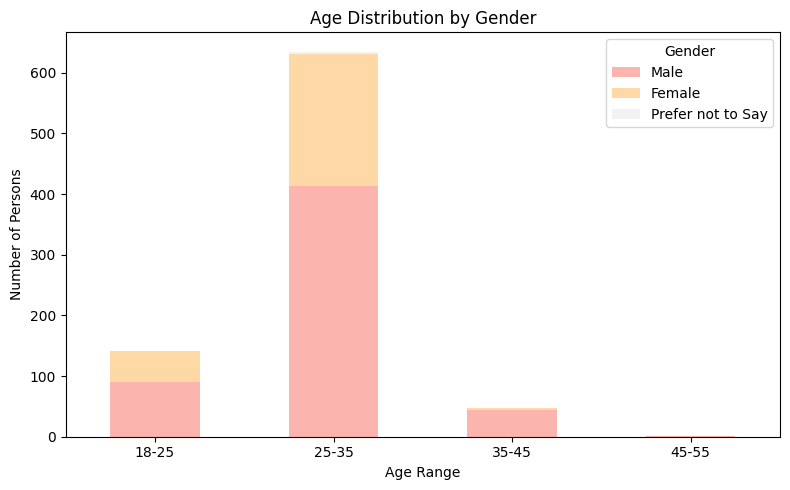

In [102]:
def plot_stacked_age_gender_distribution(df):
    """
    Plots a stacked bar chart showing the distribution of gender within each age group.
    Assumes:
      - 'age_encoded': 0=18-25, 1=25-35, 2=35-45, 3=45-55
      - 'gender_encoded': 0=Male, 1=Female, 2=Prefer not to Say
    """
    if 'age_encoded' not in df.columns or 'gender_encoded' not in df.columns:
        print("Error: Required columns not found.")
        return

    # Group and count combinations
    grouped = df.groupby(['age_encoded', 'gender_encoded']).size().unstack(fill_value=0)

    # Rename indices for age groups and columns for genders
    grouped.index = ["18-25", "25-35", "35-45", "45-55"]
    grouped.columns = ["Male", "Female", "Prefer not to Say"]

    # Plot
    grouped.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Pastel1')
    
    plt.title("Age Distribution by Gender")
    plt.xlabel("Age Range")
    plt.ylabel("Number of Persons")
    plt.legend(title="Gender", loc='upper right')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_stacked_age_gender_distribution(df)

Marital Distribution

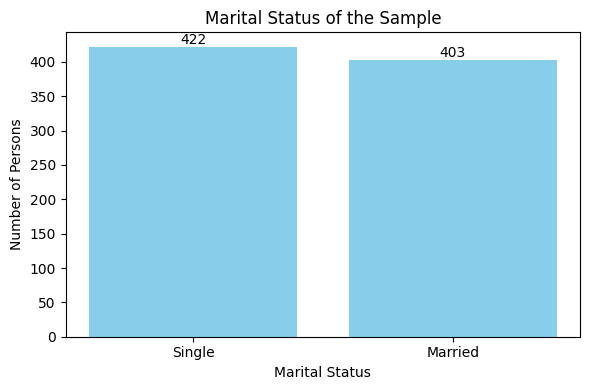

In [103]:
def plot_marital_distribution(df):
    """
    Plots the distribution of encoded marital_status_encoded values from the given DataFrame,
    and displays the exact count on top of each bar.
    Assumes 'marital_status_encoded' column contains:
        0 - Single
        1 - Married
        
    """
    if 'marital_status_encoded' not in df.columns:
        print("Error: 'marital_status_encoded' column not found in the DataFrame.")
        return

    # Get value counts sorted by index (to maintain label order)
    counts = df['marital_status_encoded'].value_counts().sort_index()
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot bar chart
    bars = ax.bar(counts.index, counts.values, color='skyblue')
    
    # Set titles and labels
    ax.set_title("Marital Status of the Sample")
    ax.set_xlabel("Marital Status")
    ax.set_ylabel("Number of Persons")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Single", "Married"])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height), 
                ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_marital_distribution(df)


used_online_shopping_encoded

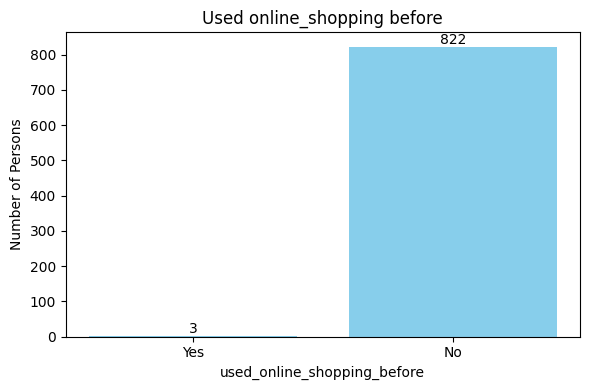

In [104]:
def plot_used_online_shopping_before(df):
    """
    Plots the distribution of encoded gender values from the given DataFrame,
    and displays the exact count on top of each bar.
    Assumes 'marital_status_encoded' column contains:
        0 - No
        1 - Yes
        
    """
    if 'used_online_shopping_encoded' not in df.columns:
        print("Error: 'used_online_shopping_encoded' column not found in the DataFrame.")
        return

    # Get value counts sorted by index (to maintain label order)
    counts = df['used_online_shopping_encoded'].value_counts().sort_index()
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot bar chart
    bars = ax.bar(counts.index, counts.values, color='skyblue')
    
    # Set titles and labels
    ax.set_title("Used online_shopping before")
    ax.set_xlabel("used_online_shopping_before")
    ax.set_ylabel("Number of Persons")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Yes", "No"])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height), 
                ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_used_online_shopping_before(df)


Education Level Distribution

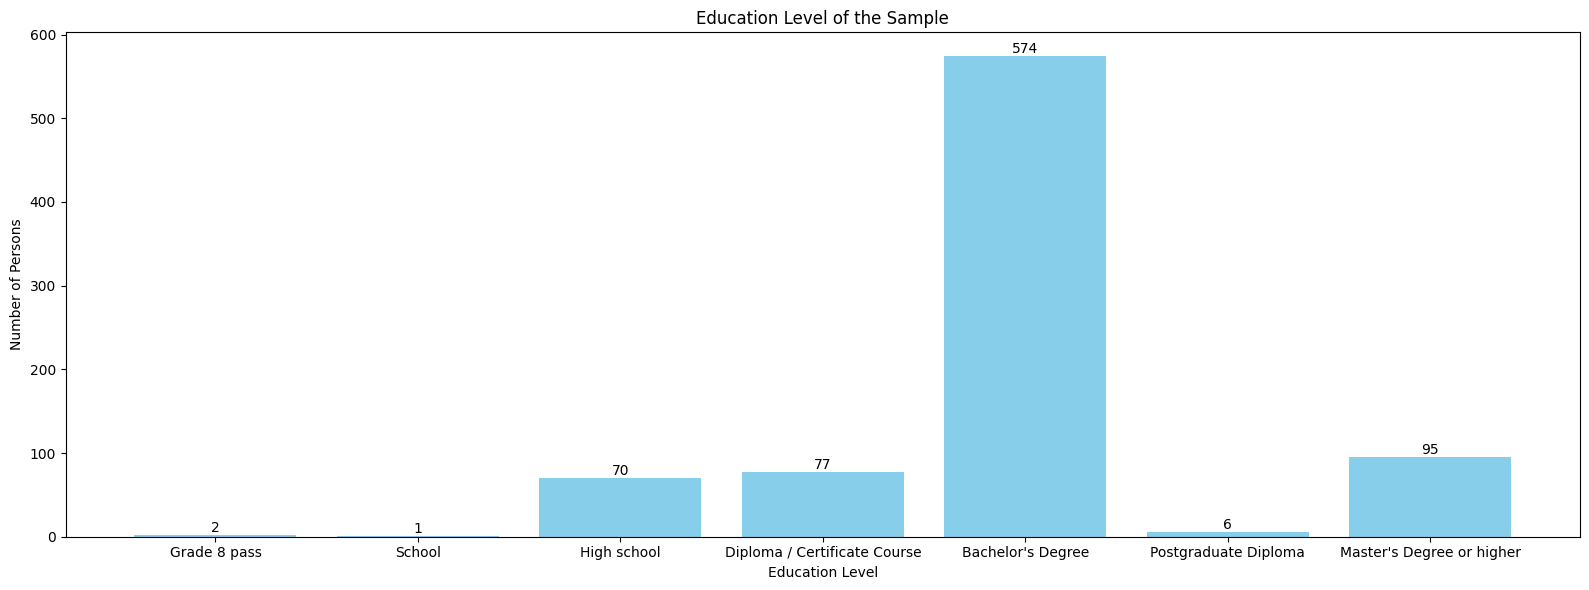

In [105]:
def plot_education_Level_distribution(df):


    if 'education_encoded' not in df.columns:
        print("Error: 'education_encoded' column not found in the DataFrame.")
        return

    # Get value counts sorted by index (to maintain label order)
    counts = df['education_encoded'].value_counts().sort_index()
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(16, 6))
    
    # Plot bar chart
    bars = ax.bar(counts.index, counts.values, color='skyblue')
    
    # Set titles and labels
    ax.set_title("Education Level of the Sample")
    ax.set_xlabel("Education Level")
    ax.set_ylabel("Number of Persons")
    ax.set_xticks([0, 1 ,2,3,4,5,6])
    ax.set_xticklabels(["Grade 8 pass", "School" ,"High school","Diploma / Certificate Course","Bachelor\'s Degree","Postgraduate Diploma","Master\'s Degree or higher"])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height), 
                ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_education_Level_distribution(df)


Job Type Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_18732\3780849862.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(job_counts.index, rotation=30, ha='right')


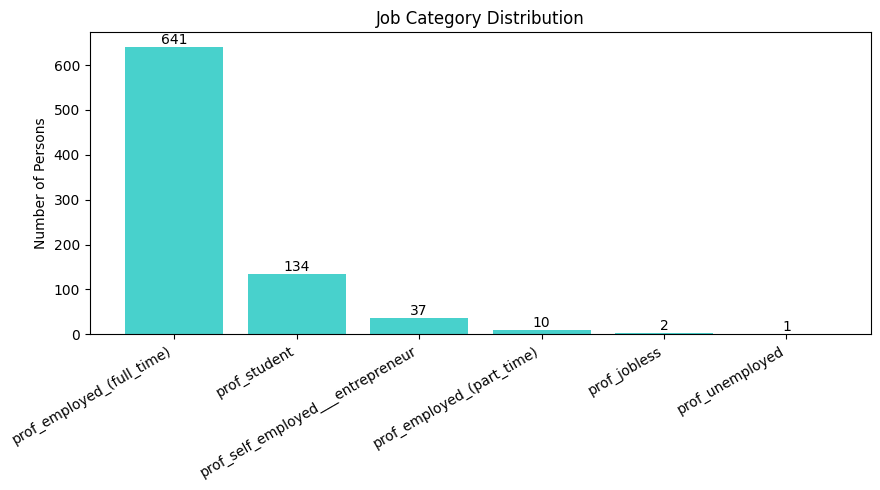


Job Category Counts and Percentages:
prof_employed_(full_time): 641 (77.7%)
prof_student: 134 (16.24%)
prof_self_employed___entrepreneur: 37 (4.48%)
prof_employed_(part_time): 10 (1.21%)
prof_jobless: 2 (0.24%)
prof_unemployed: 1 (0.12%)


In [106]:
def plot_job_distribution(df):
    """
    Plots a bar chart showing the number of persons in each job category from one-hot encoded columns.
    Also prints the counts and percentages below the chart.
    """
    job_columns = [
        'prof_employed_(full_time)',
        'prof_employed_(part_time)',
        'prof_jobless',
        'prof_self_employed___entrepreneur',
        'prof_student',
        'prof_unemployed'
    ]

    # Check if all columns exist
    missing = [col for col in job_columns if col not in df.columns]
    if missing:
        print(f"Error: Missing columns in DataFrame: {missing}")
        return

    # Sum counts
    job_counts = df[job_columns].sum().sort_values(ascending=False)
    total = job_counts.sum()
    percentages = (job_counts / total * 100).round(2)

    # Plot
    fig, ax = plt.subplots(figsize=(9, 5))
    bars = ax.bar(job_counts.index, job_counts.values, color='mediumturquoise')
    ax.set_title("Job Category Distribution")
    ax.set_ylabel("Number of Persons")
    ax.set_xticklabels(job_counts.index, rotation=30, ha='right')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height),
                ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Print counts and percentages
    print("\nJob Category Counts and Percentages:")
    for job, count in job_counts.items():
        print(f"{job}: {int(count)} ({percentages[job]}%)")

plot_job_distribution(df)


Usage of General E-Commerce Platforms

C:\Users\User\AppData\Local\Temp\ipykernel_18732\2140239423.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(clean_names, rotation=45, ha='right')


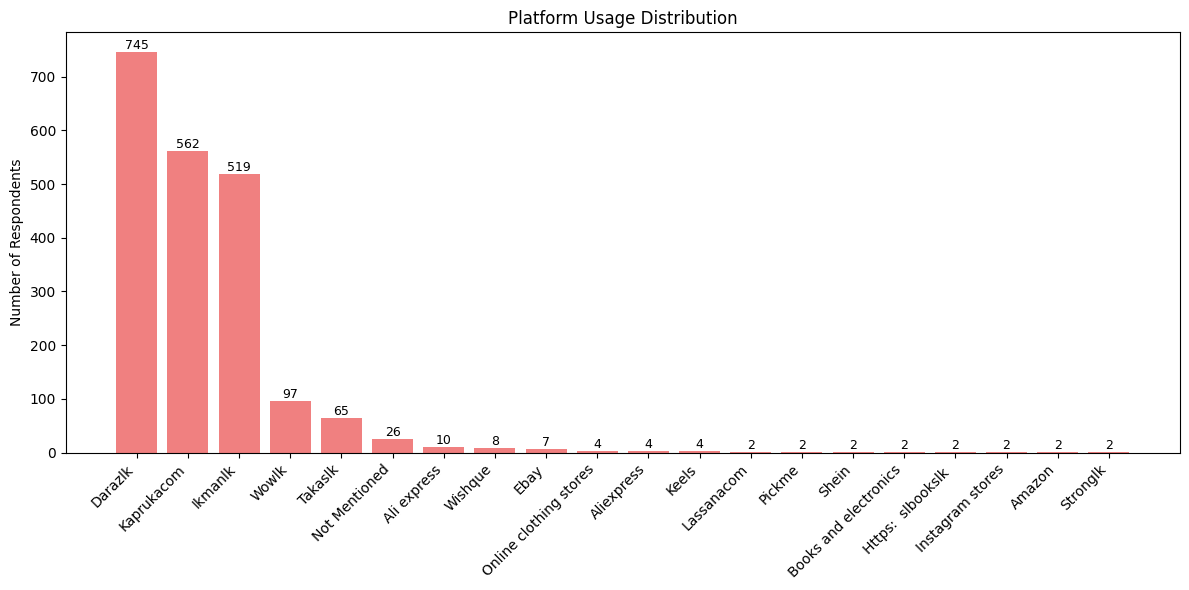


Platform Counts and Percentages (based on total respondents):
Darazlk: 745 (90.30%)
Kaprukacom: 562 (68.12%)
Ikmanlk: 519 (62.91%)
Wowlk: 97 (11.76%)
Takaslk: 65 (7.88%)
Not Mentioned: 26 (3.15%)
Ali express: 10 (1.21%)
Wishque: 8 (0.97%)
Ebay: 7 (0.85%)
Online clothing stores: 4 (0.48%)
Aliexpress: 4 (0.48%)
Keels: 4 (0.48%)
Lassanacom: 2 (0.24%)
Pickme: 2 (0.24%)
Shein: 2 (0.24%)
Books and electronics: 2 (0.24%)
Https:  slbookslk : 2 (0.24%)
Instagram stores: 2 (0.24%)
Amazon: 2 (0.24%)
Stronglk: 2 (0.24%)


In [107]:
# def plot_platform_distribution(df):
#     platform_cols = [col for col in df.columns if col.startswith('gecp_')]
    
#     if not platform_cols:
#         print("No columns with prefix 'gecp_' found.")
#         return

#     counts = df[platform_cols].sum().sort_values(ascending=False)
#     total_respondents = len(df)
#     percentages = (counts / total_respondents * 100).round(2)

#     clean_names = [col.replace('gecp_', '').replace('_', ' ').capitalize() for col in counts.index]

#     fig, ax = plt.subplots(figsize=(12, 6))
#     bars = ax.bar(clean_names, counts.values, color='lightcoral')
#     ax.set_title("Platform Usage Distribution")
#     ax.set_ylabel("Number of Persons")
#     ax.set_xticklabels(clean_names, rotation=45, ha='right')

#     for bar in bars:
#         height = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height),
#                 ha='center', va='bottom', fontsize=9)

#     plt.tight_layout()
#     plt.show()

#     print("\nPlatform Counts and Percentages (based on number of respondents):")
#     for name, count, pct in zip(clean_names, counts, percentages):
#         print(f"{name}: {int(count)} ({pct}%)")


# plot_platform_distribution(df)

import matplotlib.pyplot as plt

def plot_platform_distribution(df):
    """
    Plots a bar chart for multi-label binarized columns starting with 'gecp_'.
    Calculates percentages based on number of rows, and handles label cleaning.
    """
    # Filter columns starting with 'gecp_'
    platform_cols = [col for col in df.columns if col.startswith('gecp_')]
    
    if not platform_cols:
        print("No columns with prefix 'gecp_' found.")
        return

    # Calculate counts and percentages (relative to total respondents)
    counts = df[platform_cols].sum().sort_values(ascending=False)
    total_respondents = len(df)
    percentages = (counts / total_respondents * 100).round(2)

    # Clean column names
    def clean_label(col):
        if col.strip() == 'gecp_':
            return 'Not Mentioned'
        return col.replace('gecp_', '').replace('_', ' ').capitalize()

    clean_names = [clean_label(col) for col in counts.index]

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(clean_names, counts.values, color='lightcoral')
    ax.set_title("Platform Usage Distribution")
    ax.set_ylabel("Number of Respondents")
    ax.set_xticklabels(clean_names, rotation=45, ha='right')

    # Add exact counts above bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height),
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Print counts and percentages
    print("\nPlatform Counts and Percentages (based on total respondents):")
    for name, count, percent in zip(clean_names, counts, percentages):
        print(f"{name}: {int(count)} ({percent:.2f}%)")

plot_platform_distribution(df)


Usage of Special Online Stores like Auto-Mobile selling platforms

C:\Users\User\AppData\Local\Temp\ipykernel_18732\1582092999.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(clean_names, rotation=45, ha='right')


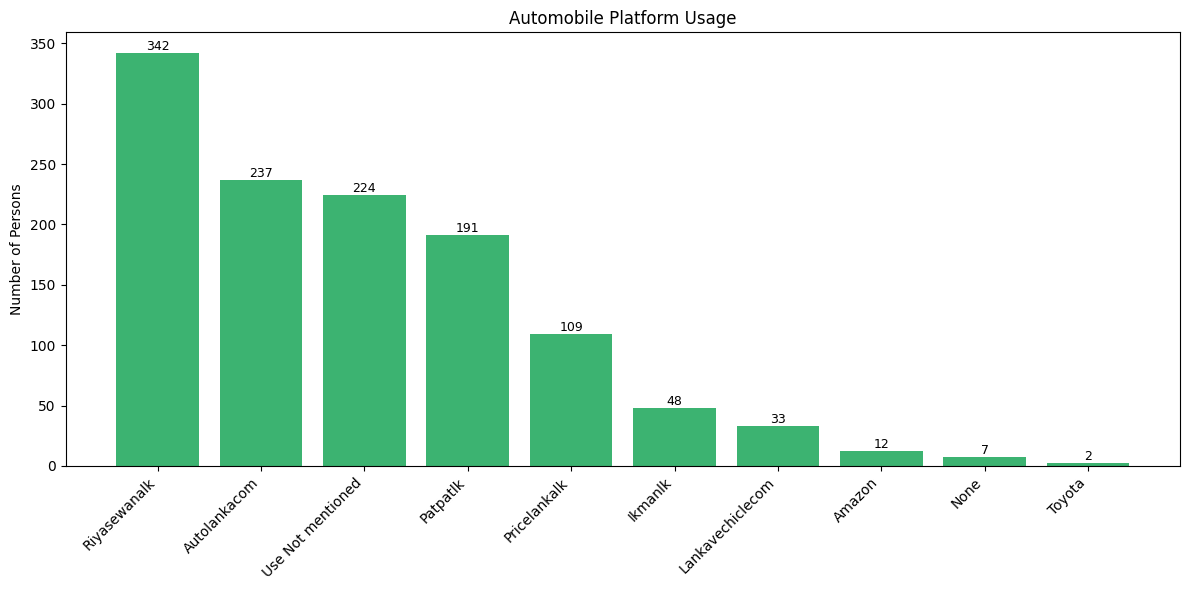


Automobile Platform Counts and Percentages:
Riyasewanalk: 342 (41.45%)
Autolankacom: 237 (28.73%)
Use Not mentioned: 224 (27.15%)
Patpatlk: 191 (23.15%)
Pricelankalk: 109 (13.21%)
Ikmanlk: 48 (5.82%)
Lankavechiclecom: 33 (4.0%)
Amazon: 12 (1.45%)
None: 7 (0.85%)
Toyota: 2 (0.24%)


In [108]:
def plot_automobile_platform_distribution(df):
    """
    Plots a bar chart for 'sos_automobile_' prefixed columns,
    replacing 'sos_automobile_' with clean names and labeling the empty prefix column as 'None'.
    Displays counts on bars and prints counts and percentages below.
    """
    # Select columns
    platform_cols = [col for col in df.columns if col.startswith('sos_automobile_')]
    
    if not platform_cols:
        print("No columns with prefix 'sos_automobile_' found.")
        return

    # Sum and sort
    counts = df[platform_cols].sum().sort_values(ascending=False)
    total_respondents = len(df)
    percentages = (counts / total_respondents * 100).round(2)

    # Create clean names
    clean_names = [
        "Use Not mentioned" if col == "sos_automobile_" else col.replace("sos_automobile_", "").replace("_", " ").capitalize()
        for col in counts.index
    ]

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(clean_names, counts.values, color='mediumseagreen')
    ax.set_title("Automobile Platform Usage")
    ax.set_ylabel("Number of Persons")
    ax.set_xticklabels(clean_names, rotation=45, ha='right')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, int(height),
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Print counts and percentages
    print("\nAutomobile Platform Counts and Percentages:")
    for name, count, pct in zip(clean_names, counts, percentages):
        print(f"{name}: {int(count)} ({pct}%)")

plot_automobile_platform_distribution(df)


online pharmacy platform usage

C:\Users\User\AppData\Local\Temp\ipykernel_18732\18312653.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(clean_names, rotation=45, ha='right')


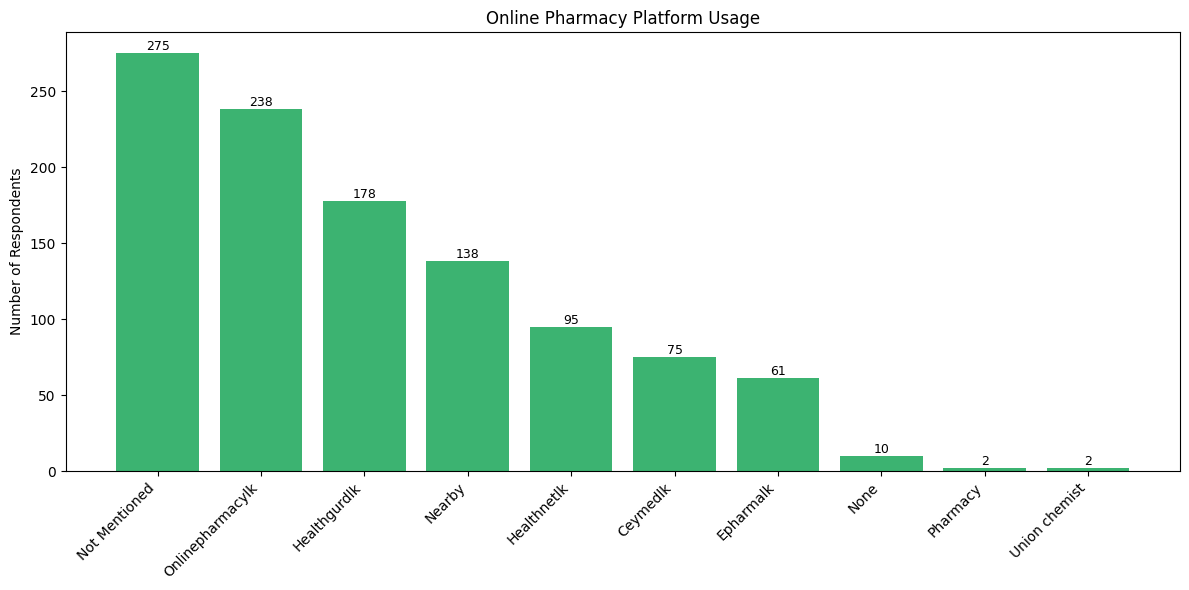


Online Pharmacy Platform Counts and Percentages (based on total respondents):
Not Mentioned: 275 (33.33%)
Onlinepharmacylk: 238 (28.85%)
Healthgurdlk: 178 (21.58%)
Nearby: 138 (16.73%)
Healthnetlk: 95 (11.52%)
Ceymedlk: 75 (9.09%)
Epharmalk: 61 (7.39%)
None: 10 (1.21%)
Pharmacy: 2 (0.24%)
Union chemist: 2 (0.24%)


In [109]:
def plot_op_platform_distribution(df):
    """
    Plots a bar chart for multi-label binarized columns starting with 'op_' (online pharmacies).
    Calculates percentages based on the number of rows.
    Renames 'op_' column as 'Not Mentioned' and others with cleaned names.
    """
    # Filter 'op_' columns
    op_cols = [col for col in df.columns if col.startswith('op_')]

    if not op_cols:
        print("No columns with prefix 'op_' found.")
        return

    # Count selections
    counts = df[op_cols].sum().sort_values(ascending=False)
    total_respondents = len(df)
    percentages = (counts / total_respondents * 100).round(2)

    # Clean labels
    def clean_label(col):
        return 'Not Mentioned' if col.strip() == 'op_' else col.replace('op_', '').replace('_', ' ').capitalize()

    clean_names = [clean_label(col) for col in counts.index]

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(clean_names, counts.values, color='mediumseagreen')
    ax.set_title("Online Pharmacy Platform Usage")
    ax.set_ylabel("Number of Respondents")
    ax.set_xticklabels(clean_names, rotation=45, ha='right')

    # Add counts above bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height),
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Print counts and percentages
    print("\nOnline Pharmacy Platform Counts and Percentages (based on total respondents):")
    for name, count, percent in zip(clean_names, counts, percentages):
        print(f"{name}: {int(count)} ({percent:.2f}%)")


plot_op_platform_distribution(df)


Fashion and Beauty Retailers platform usage

C:\Users\User\AppData\Local\Temp\ipykernel_18732\3838976348.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(clean_names, rotation=45, ha='right')


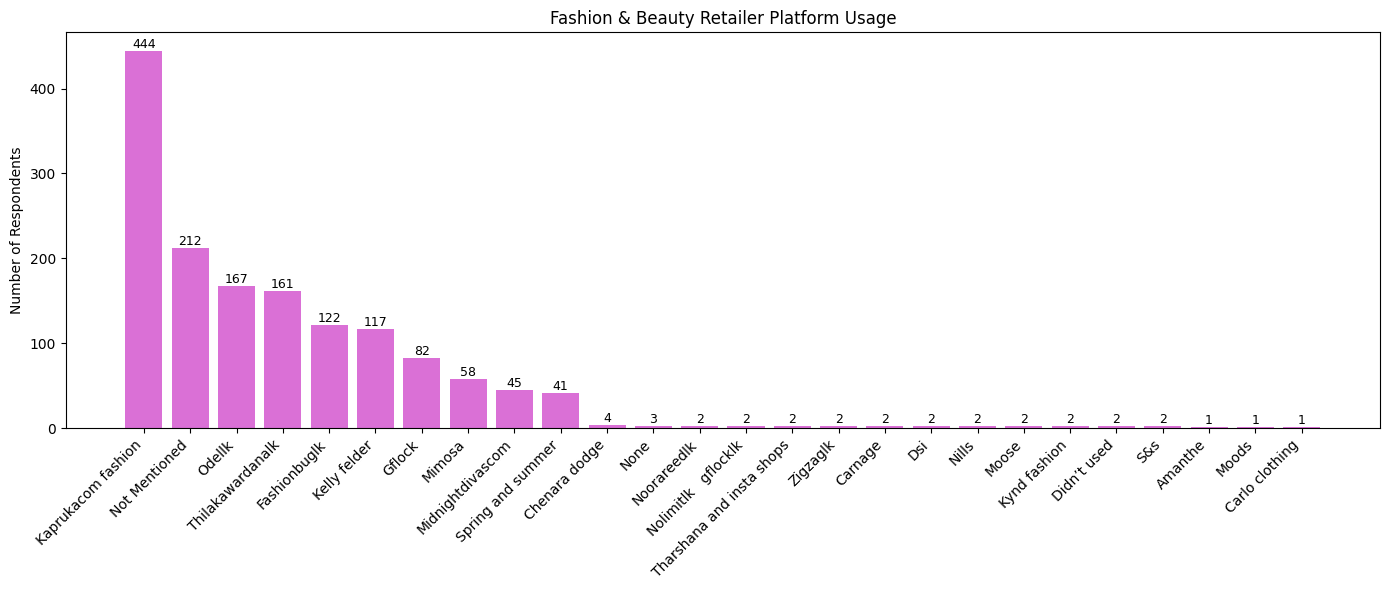


Fashion & Beauty Retailer Platform Counts and Percentages (based on total respondents):
Kaprukacom fashion: 444 (53.82%)
Not Mentioned: 212 (25.70%)
Odellk: 167 (20.24%)
Thilakawardanalk: 161 (19.52%)
Fashionbuglk: 122 (14.79%)
Kelly felder: 117 (14.18%)
Gflock: 82 (9.94%)
Mimosa: 58 (7.03%)
Midnightdivascom: 45 (5.45%)
Spring and summer: 41 (4.97%)
Chenara dodge: 4 (0.48%)
None: 3 (0.36%)
Noorareedlk: 2 (0.24%)
Nolimitlk   gflocklk: 2 (0.24%)
Tharshana and insta shops: 2 (0.24%)
Zigzaglk: 2 (0.24%)
Carnage: 2 (0.24%)
Dsi: 2 (0.24%)
Nills: 2 (0.24%)
Moose: 2 (0.24%)
Kynd fashion: 2 (0.24%)
Didn’t used: 2 (0.24%)
S&s: 2 (0.24%)
Amanthe: 1 (0.12%)
Moods: 1 (0.12%)
Carlo clothing: 1 (0.12%)


In [110]:
def plot_fabr_platform_distribution(df):
    """
    Plots a bar chart for Fashion and Beauty Retailer platforms (columns with prefix 'fabr_').
    - Removes 'fabr_' from labels.
    - If column is only 'fabr_', label as 'Not Mentioned'.
    - Shows counts on top of each bar and prints counts + percentages below.
    """
    fabr_cols = [col for col in df.columns if col.startswith('fabr_')]
    
    if not fabr_cols:
        print("No columns with prefix 'fabr_' found.")
        return

    # Count total occurrences
    counts = df[fabr_cols].sum().sort_values(ascending=False)
    total_respondents = len(df)
    percentages = (counts / total_respondents * 100).round(2)

    # Clean column names for labels
    def clean_label(col):
        return "Not Mentioned" if col.strip() == 'fabr_' else col.replace('fabr_', '').replace('_', ' ').capitalize()

    clean_names = [clean_label(col) for col in counts.index]

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 6))
    bars = ax.bar(clean_names, counts.values, color='orchid')
    ax.set_title("Fashion & Beauty Retailer Platform Usage")
    ax.set_ylabel("Number of Respondents")
    ax.set_xticklabels(clean_names, rotation=45, ha='right')

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height),
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Print counts and percentages
    print("\nFashion & Beauty Retailer Platform Counts and Percentages (based on total respondents):")
    for name, count, percent in zip(clean_names, counts, percentages):
        print(f"{name}: {int(count)} ({percent:.2f}%)")


plot_fabr_platform_distribution(df)


Grocery Delivery Services platform

C:\Users\User\AppData\Local\Temp\ipykernel_18732\3742162814.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(clean_names, rotation=45, ha='right')


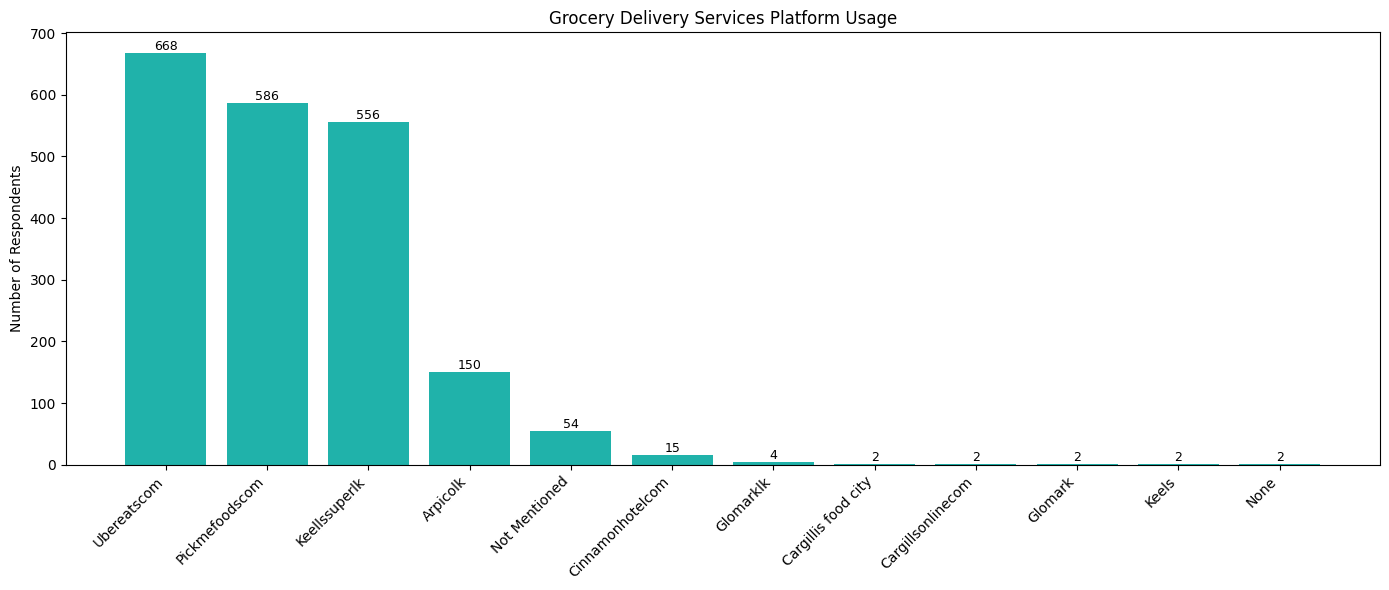


Grocery Delivery Services Platform Counts and Percentages (based on total respondents):
Ubereatscom: 668 (80.97%)
Pickmefoodscom: 586 (71.03%)
Keellssuperlk: 556 (67.39%)
Arpicolk: 150 (18.18%)
Not Mentioned: 54 (6.55%)
Cinnamonhotelcom: 15 (1.82%)
Glomarklk: 4 (0.48%)
Cargillis food city: 2 (0.24%)
Cargillsonlinecom: 2 (0.24%)
Glomark: 2 (0.24%)
Keels: 2 (0.24%)
None: 2 (0.24%)


In [111]:
def plot_gds_platform_distribution(df):
    """
    Plots a bar chart for Grocery Delivery Services platforms (columns with prefix 'gds_').
    - Removes 'gds_' from labels.
    - If column is only 'gds_', label as 'Not Mentioned'.
    - Shows counts on top of each bar and prints counts + percentages below.
    """
    gds_cols = [col for col in df.columns if col.startswith('gds_')]
    
    if not gds_cols:
        print("No columns with prefix 'gds_' found.")
        return

    # Count total selections per platform
    counts = df[gds_cols].sum().sort_values(ascending=False)
    total_respondents = len(df)
    percentages = (counts / total_respondents * 100).round(2)

    # Clean column names for display
    def clean_label(col):
        return "Not Mentioned" if col.strip() == 'gds_' else col.replace('gds_', '').replace('_', ' ').capitalize()

    clean_names = [clean_label(col) for col in counts.index]

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 6))
    bars = ax.bar(clean_names, counts.values, color='lightseagreen')
    ax.set_title("Grocery Delivery Services Platform Usage")
    ax.set_ylabel("Number of Respondents")
    ax.set_xticklabels(clean_names, rotation=45, ha='right')

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height),
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Print counts and percentages
    print("\nGrocery Delivery Services Platform Counts and Percentages (based on total respondents):")
    for name, count, percent in zip(clean_names, counts, percentages):
        print(f"{name}: {int(count)} ({percent:.2f}%)")



plot_gds_platform_distribution(df)


# Supportive Function

In [112]:
# def summarize_likert_responses(df, column_name):
#     """
#     Summarizes Likert scale responses (1–5) from a specified column in the DataFrame.
#     Prints both counts and percentages for each response category.
    
#     Mapping:
#     1 - Strongly Disagree
#     2 - Disagree
#     3 - Neutral
#     4 - Agree
#     5 - Strongly Agree
#     """
#     if column_name not in df.columns:
#         print(f"Error: Column '{column_name}' not found in the DataFrame.")
#         return

#     label_map = {
#         1: "Strongly Disagree",
#         2: "Disagree",
#         3: "Neutral",
#         4: "Agree",
#         5: "Strongly Agree"
#     }

#     # Count valid responses (excluding NaN)
#     counts = df[column_name].value_counts().sort_index()
#     total = counts.sum()
#     percentages = (counts / total * 100).round(2)

#     print(f"\nSummary for column: {column_name}\n")
#     print(f"{'Response':<20}{'Count':<10}{'Percentage':<10}")
#     print("-" * 40)
    
#     for value in range(1, 6):
#         label = label_map[value]
#         count = counts.get(value, 0)
#         percent = percentages.get(value, 0.0)
#         print(f"{label:<20}{count:<10}{percent:<10.2f}")

def summarize_likert_responses(df, column_name):
    """
    Summarizes Likert scale responses (1–5) from a specified column in the DataFrame.
    Prints both counts and percentages, and displays a pie chart.
    
    Mapping:
    1 - Strongly Disagree
    2 - Disagree
    3 - Neutral
    4 - Agree
    5 - Strongly Agree
    """
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    label_map = {
        1: "Strongly Disagree",
        2: "Disagree",
        3: "Neutral",
        4: "Agree",
        5: "Strongly Agree"
    }

    # Count valid responses (excluding NaN)
    counts = df[column_name].value_counts().sort_index()
    total = counts.sum()
    percentages = (counts / total * 100).round(2)

    print(f"\nSummary for column: {column_name}\n")
    print(f"{'Response':<20}{'Count':<10}{'Percentage':<10}")
    print("-" * 40)
    
    labels = []
    sizes = []
    for value in range(1, 6):
        label = label_map[value]
        count = counts.get(value, 0)
        percent = percentages.get(value, 0.0)
        print(f"{label:<20}{count:<10}{percent:<10.2f}")
        labels.append(label)
        sizes.append(count)

    # Plot pie chart
    colors = ['#FF9999', '#FFCC99', '#FFFF99', '#CCFF99', '#99CCFF']
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f"Distribution of Responses for '{column_name}'")
    plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
    plt.tight_layout()
    plt.show()

# Perceived Ease of Use (PEOU)

It is easy to navigate through the online platform to find the products or services I need


Summary for column: peou_navigation_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   19        2.30      
Disagree            13        1.58      
Neutral             432       52.36     
Agree               235       28.48     
Strongly Agree      126       15.27     


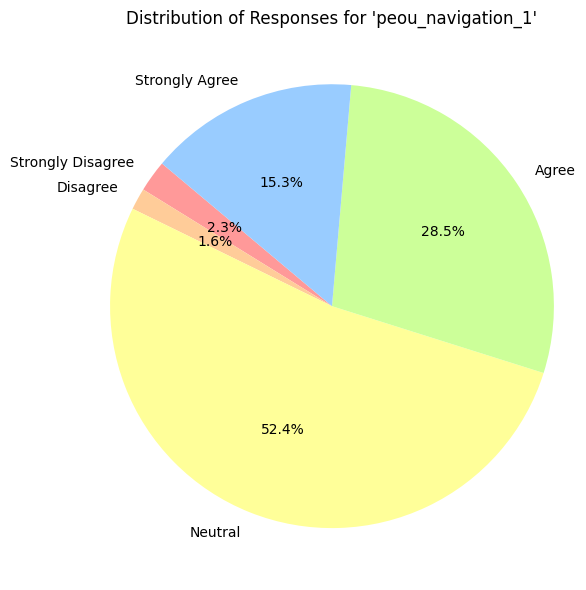

In [113]:
summarize_likert_responses(df, 'peou_navigation_1')


The online platform provides clear and intuitive navigation options


Summary for column: peou_navigation_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   9         1.09      
Disagree            25        3.03      
Neutral             496       60.12     
Agree               193       23.39     
Strongly Agree      102       12.36     


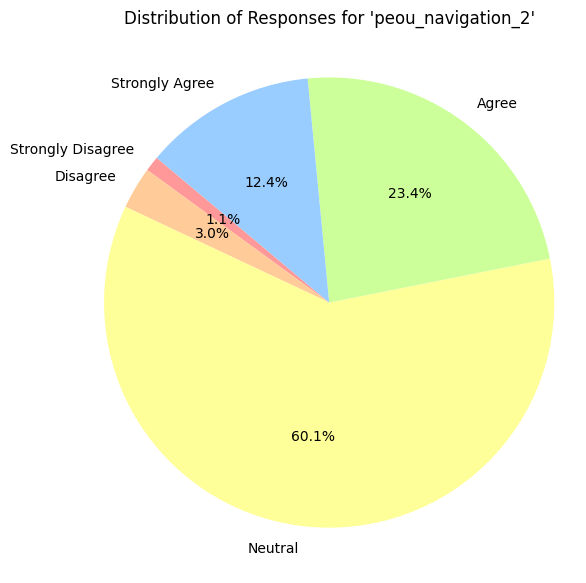

In [114]:
summarize_likert_responses(df, 'peou_navigation_2')


It was easy for me to learn how to use the online platform for making online purchases


Summary for column: peou_learning_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   17        2.06      
Disagree            34        4.12      
Neutral             427       51.76     
Agree               258       31.27     
Strongly Agree      89        10.79     


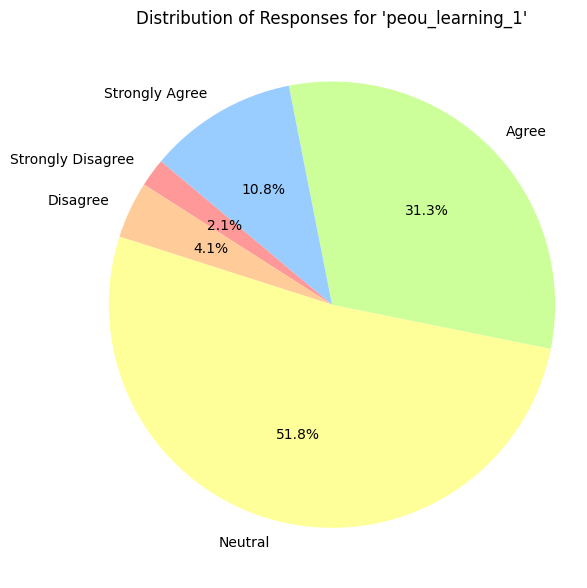

In [115]:
summarize_likert_responses(df, 'peou_learning_1')


I quickly became proficient in using the online platform for making online purchases during a crisis


Summary for column: peou_learning_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   16        1.94      
Disagree            27        3.27      
Neutral             457       55.39     
Agree               228       27.64     
Strongly Agree      97        11.76     


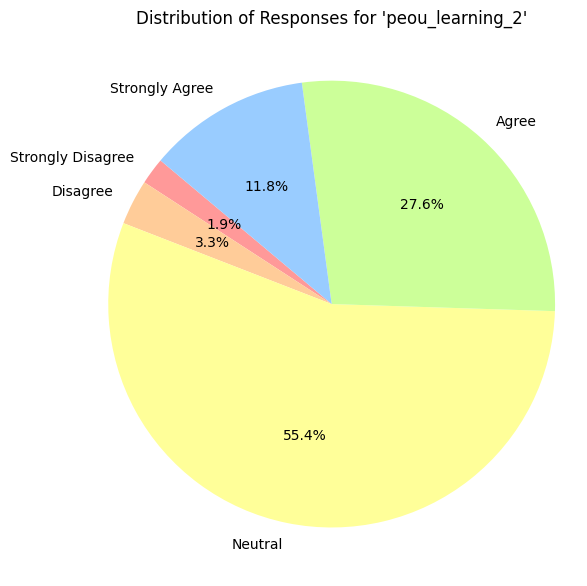

In [116]:
summarize_likert_responses(df, 'peou_learning_2')

The instructions provided on the online platform are clear and easy to understand


Summary for column: peou_instructions_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   14        1.70      
Disagree            21        2.55      
Neutral             565       68.48     
Agree               174       21.09     
Strongly Agree      51        6.18      


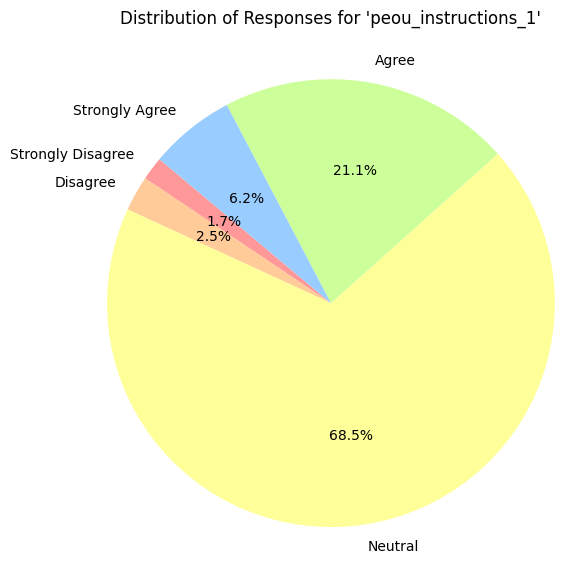

In [117]:
summarize_likert_responses(df, 'peou_instructions_1')


I can easily follow the instructions given on the online platform for making online purchases


Summary for column: peou_instructions_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   11        1.33      
Disagree            27        3.27      
Neutral             501       60.73     
Agree               214       25.94     
Strongly Agree      72        8.73      


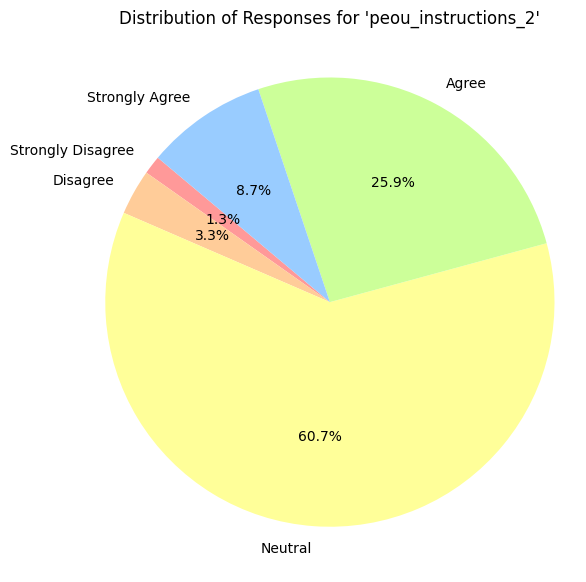

In [118]:
summarize_likert_responses(df, 'peou_instructions_2')

The online platform effectively handles errors or mistakes, such as providing clear error messages and easy recovery options


Summary for column: peou_error_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   23        2.79      
Disagree            133       16.12     
Neutral             511       61.94     
Agree               115       13.94     
Strongly Agree      43        5.21      


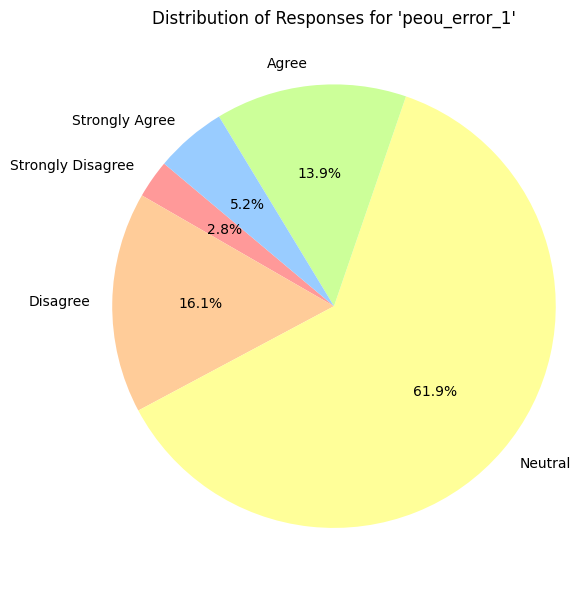

In [119]:
summarize_likert_responses(df, 'peou_error_1')

I rarely encounter errors or issues when using the online platform for making online purchases during a crisis


Summary for column: peou_error_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   17        2.06      
Disagree            204       24.73     
Neutral             448       54.30     
Agree               112       13.58     
Strongly Agree      44        5.33      


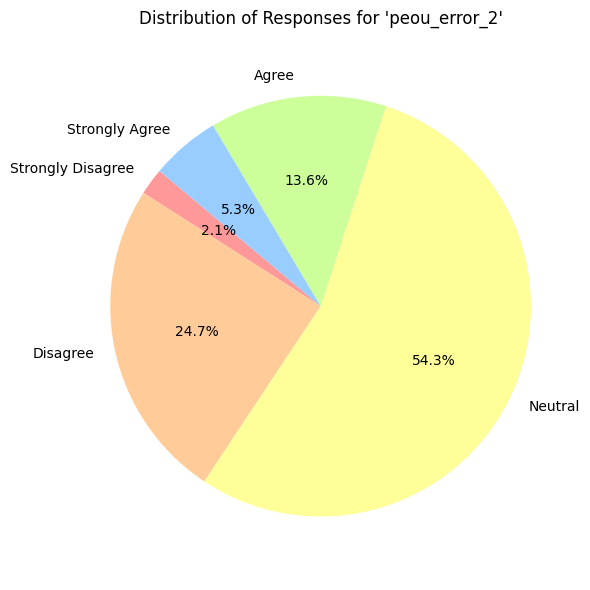

In [120]:
summarize_likert_responses(df, 'peou_error_2')

The online platform responds quickly to my actions, such as loading pages and processing transactions


Summary for column: peou_response_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   20        2.42      
Disagree            63        7.64      
Neutral             520       63.03     
Agree               163       19.76     
Strongly Agree      59        7.15      


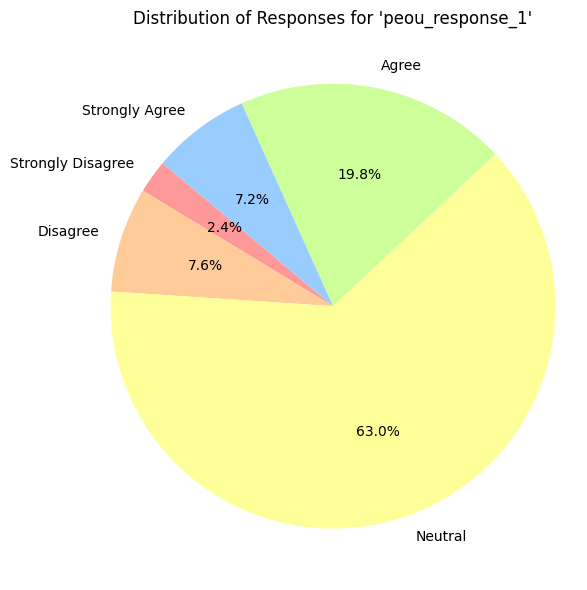

In [121]:
summarize_likert_responses(df, 'peou_response_1')


I don\'t experience delays or long waiting times when using the online platform for making online purchases during a crisis.


Summary for column: peou_response_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   34        4.12      
Disagree            131       15.88     
Neutral             567       68.73     
Agree               71        8.61      
Strongly Agree      22        2.67      


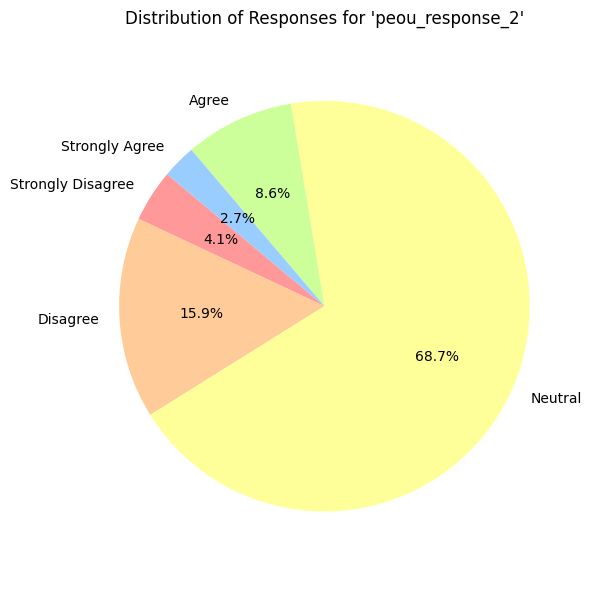

In [122]:
summarize_likert_responses(df, 'peou_response_2')

# Perceived Usefulness (PU)

The online platform offers a wide range of products and services that meet my needs during a crisis.


Summary for column: pu_product_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   16        1.94      
Disagree            38        4.61      
Neutral             498       60.36     
Agree               182       22.06     
Strongly Agree      91        11.03     


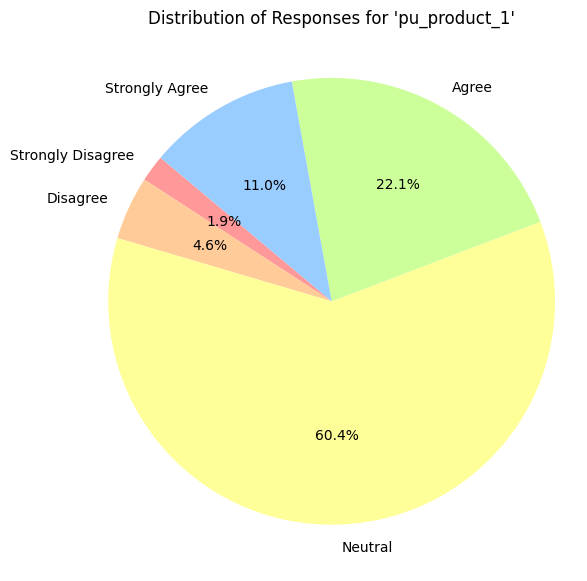

In [123]:
summarize_likert_responses(df, 'pu_product_1')

I can find the products or services I need on the online platform during a crisis.


Summary for column: pu_product_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   15        1.82      
Disagree            31        3.76      
Neutral             525       63.64     
Agree               188       22.79     
Strongly Agree      66        8.00      


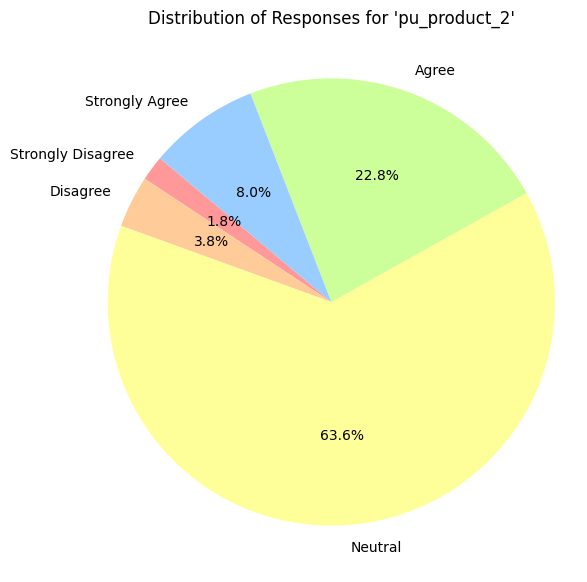

In [124]:
summarize_likert_responses(df, 'pu_product_2')


Using the online platform for making purchases during a crisis is convenient and saves time.


Summary for column: pu_convenience_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   20        2.42      
Disagree            14        1.70      
Neutral             370       44.85     
Agree               239       28.97     
Strongly Agree      182       22.06     


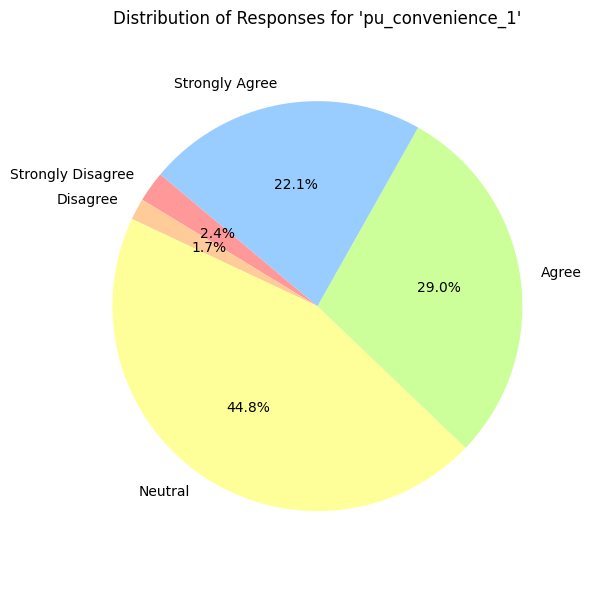

In [125]:
summarize_likert_responses(df, 'pu_convenience_1')


The online platform makes it easy to search for products and complete transactions during a crisis.


Summary for column: pu_convenience_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   17        2.06      
Disagree            16        1.94      
Neutral             399       48.36     
Agree               235       28.48     
Strongly Agree      158       19.15     


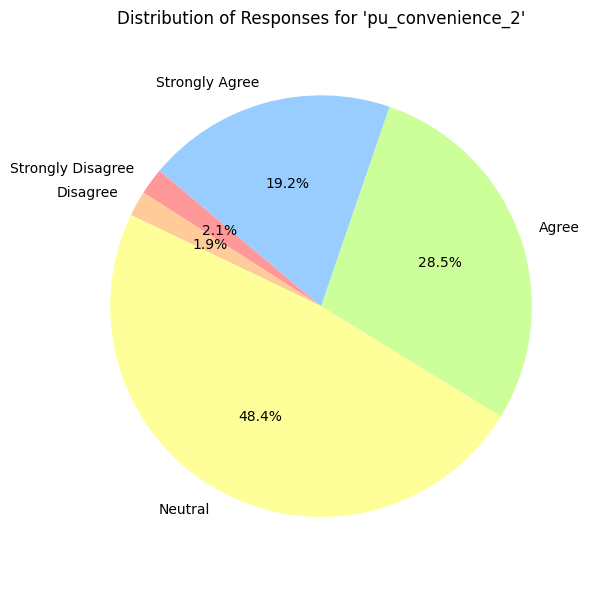

In [126]:
summarize_likert_responses(df, 'pu_convenience_2')


The online platform offers competitive prices, discounts, or cost-saving benefits during a crisis.


Summary for column: pu_cost_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   37        4.48      
Disagree            54        6.55      
Neutral             551       66.79     
Agree               143       17.33     
Strongly Agree      40        4.85      


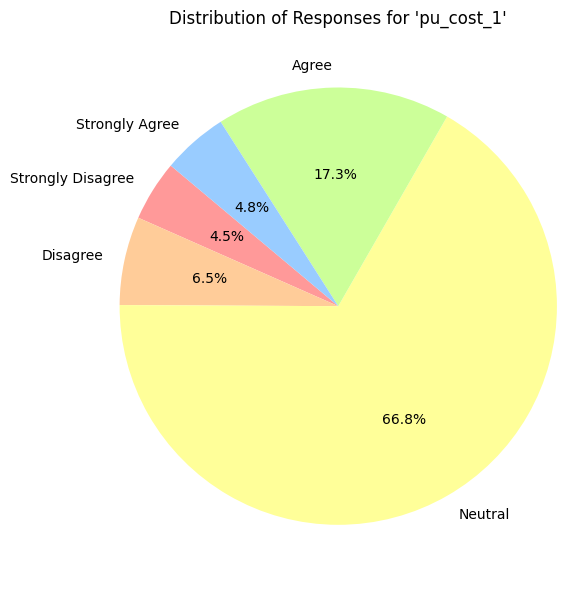

In [127]:
summarize_likert_responses(df, 'pu_cost_1')



I perceive that using the online platform for making purchases during a crisis can help me save money.


Summary for column: pu_cost_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   28        3.39      
Disagree            81        9.82      
Neutral             501       60.73     
Agree               160       19.39     
Strongly Agree      55        6.67      


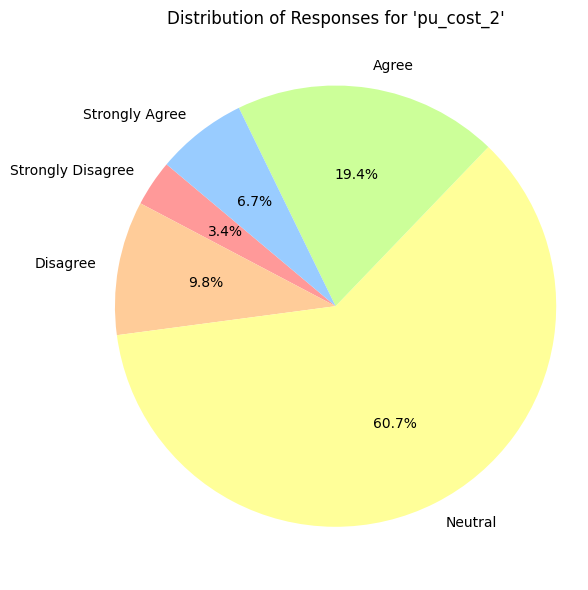

In [128]:
summarize_likert_responses(df, 'pu_cost_2')

The online platform provides detailed and accurate product information during a crisis.


Summary for column: pu_info_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   19        2.30      
Disagree            65        7.88      
Neutral             559       67.76     
Agree               157       19.03     
Strongly Agree      25        3.03      


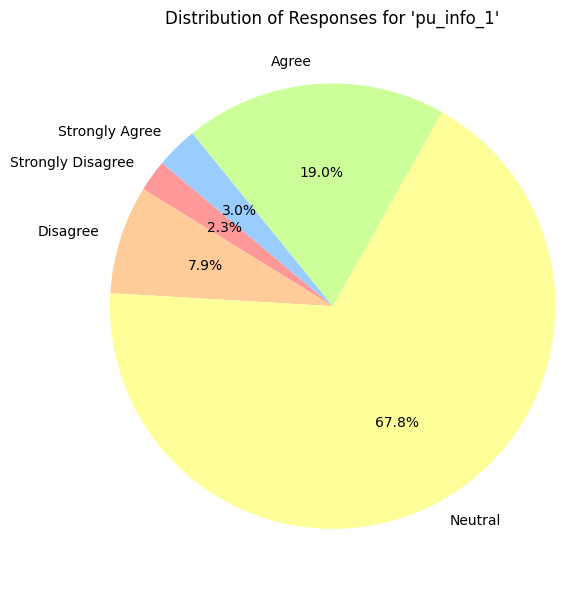

In [129]:
summarize_likert_responses(df, 'pu_info_1')

I can easily access user reviews, ratings, and other relevant information to support my purchase decisions.


Summary for column: pu_info_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   17        2.06      
Disagree            125       15.15     
Neutral             427       51.76     
Agree               216       26.18     
Strongly Agree      40        4.85      


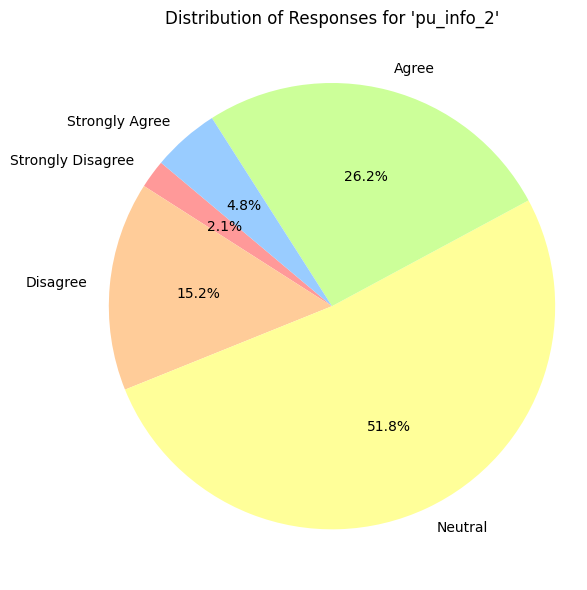

In [130]:
summarize_likert_responses(df, 'pu_info_2')

The online platform tailors recommendations, suggestions, or personalized offers based on my preferences.


Summary for column: pu_personalization_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   18        2.18      
Disagree            48        5.82      
Neutral             524       63.52     
Agree               205       24.85     
Strongly Agree      30        3.64      


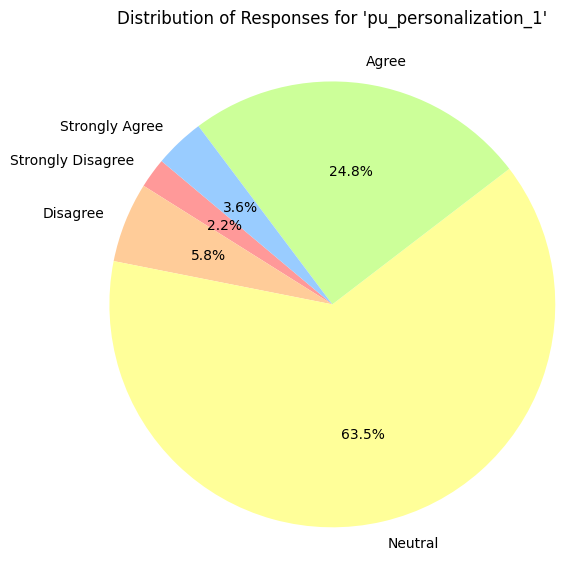

In [131]:
summarize_likert_responses(df, 'pu_personalization_1')

I feel that the online platform understands my needs and preferences during a crisis.


Summary for column: pu_personalization_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   20        2.42      
Disagree            51        6.18      
Neutral             543       65.82     
Agree               177       21.45     
Strongly Agree      34        4.12      


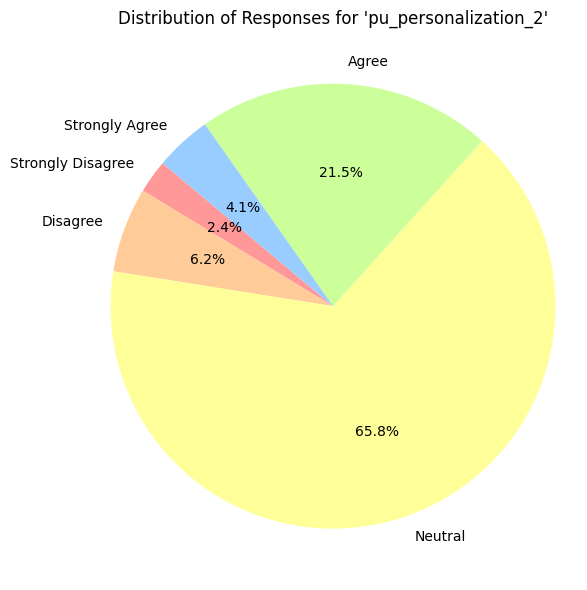

In [132]:
summarize_likert_responses(df, 'pu_personalization_2')

# Structural Assurance (SA)

The online platform takes appropriate measures to protect my privacy?


Summary for column: sa_privacy_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   17        2.06      
Disagree            46        5.58      
Neutral             569       68.97     
Agree               162       19.64     
Strongly Agree      31        3.76      


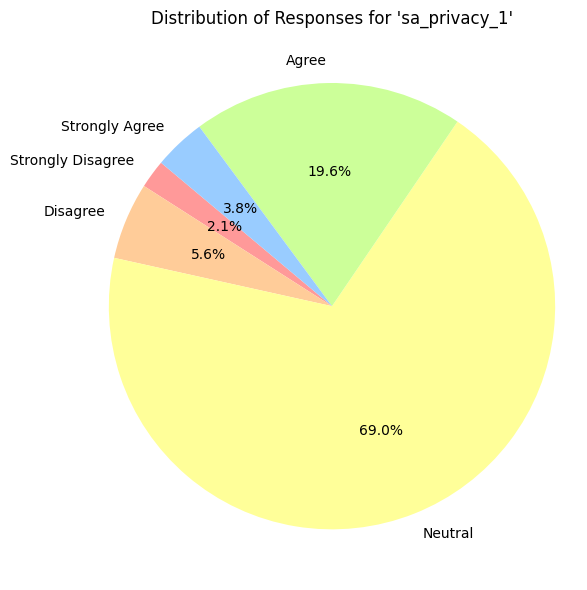

In [133]:
summarize_likert_responses(df, 'sa_privacy_1')

I trust that my personal information will be handled securely by the online platform?


Summary for column: sa_privacy_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   17        2.06      
Disagree            76        9.21      
Neutral             551       66.79     
Agree               157       19.03     
Strongly Agree      24        2.91      


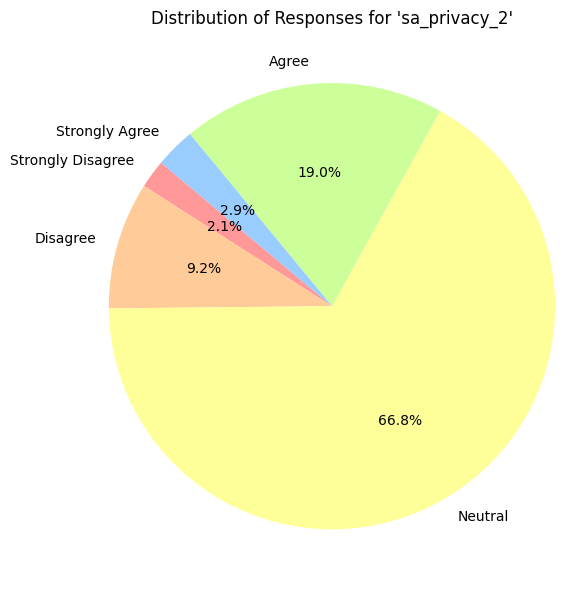

In [134]:
summarize_likert_responses(df, 'sa_privacy_2')

The online platform provides secure payment methods to protect against fraudulent activities during a crisis.


Summary for column: sa_payment_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   10        1.21      
Disagree            31        3.76      
Neutral             510       61.82     
Agree               242       29.33     
Strongly Agree      32        3.88      


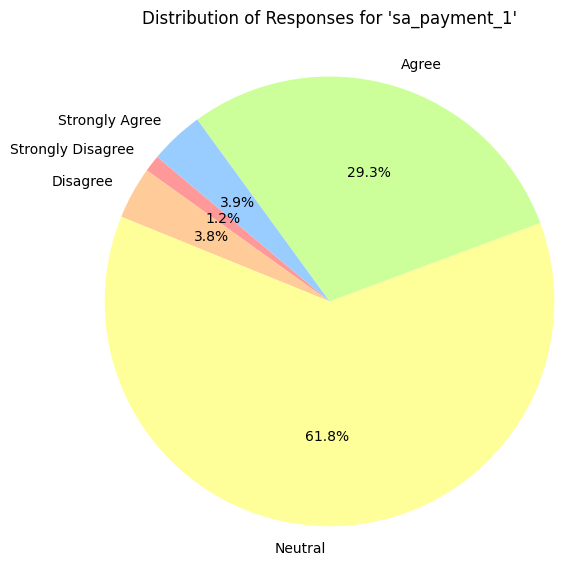

In [135]:
summarize_likert_responses(df, 'sa_payment_1')

I trust that my payment details are handled securely by the online platform.


Summary for column: sa_payment_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   14        1.70      
Disagree            33        4.00      
Neutral             513       62.18     
Agree               212       25.70     
Strongly Agree      53        6.42      


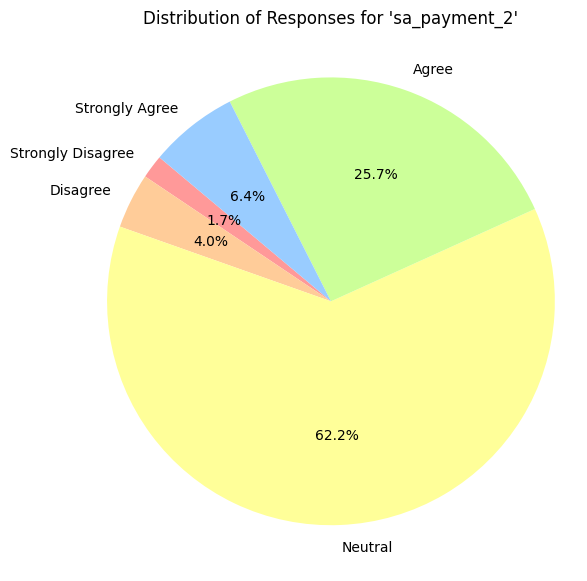

In [136]:
summarize_likert_responses(df, 'sa_payment_2')

The online platform provides clear and easily accessible policies regarding data handling, privacy, and security.


Summary for column: sa_policy_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   13        1.58      
Disagree            57        6.91      
Neutral             593       71.88     
Agree               115       13.94     
Strongly Agree      47        5.70      


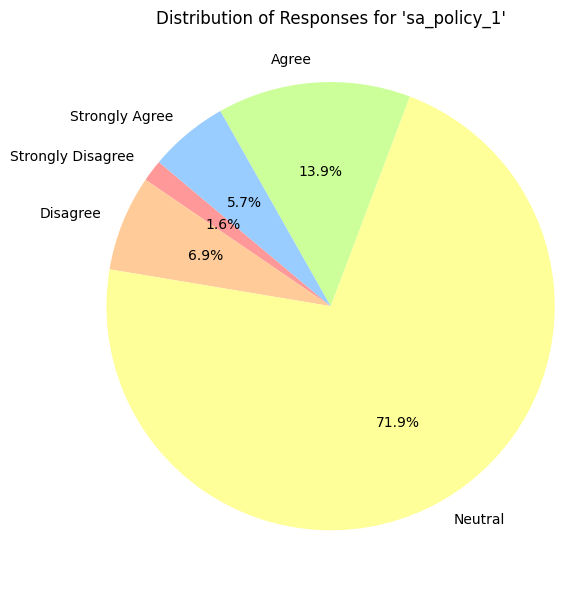

In [137]:
summarize_likert_responses(df, 'sa_policy_1')

I feel confident in the online platform\'s transparency regarding its data protection practices.


Summary for column: sa_policy_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   22        2.67      
Disagree            55        6.67      
Neutral             601       72.85     
Agree               122       14.79     
Strongly Agree      25        3.03      


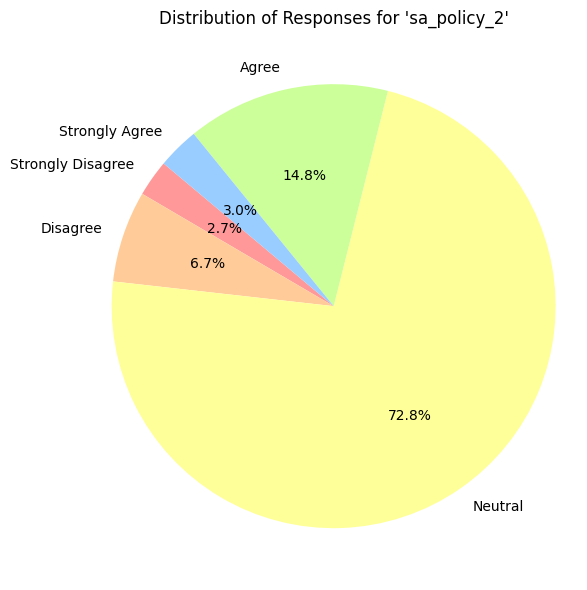

In [138]:
summarize_likert_responses(df, 'sa_policy_2')

# Social Influence (SI)

I am influenced by recommendations and opinions from family and friends when making online purchases during a crisis.


Summary for column: si_wom_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   18        2.18      
Disagree            35        4.24      
Neutral             421       51.03     
Agree               213       25.82     
Strongly Agree      138       16.73     


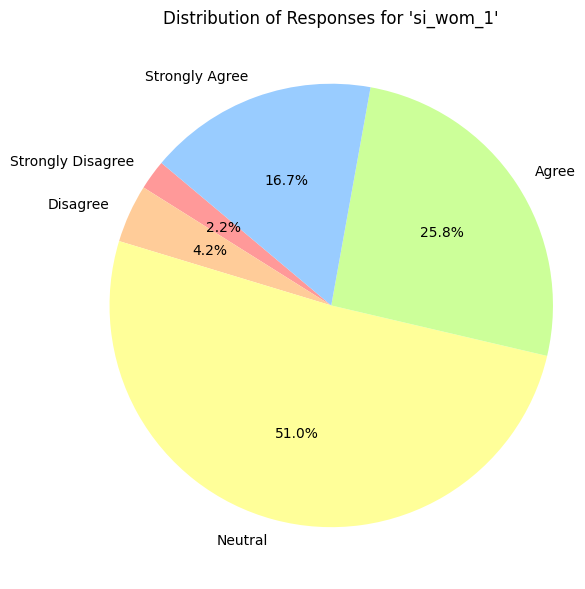

In [139]:
summarize_likert_responses(df, 'si_wom_1')

I consider the experiences and suggestions shared by people I know before making online purchases during a crisis.


Summary for column: si_wom_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   13        1.58      
Disagree            8         0.97      
Neutral             442       53.58     
Agree               257       31.15     
Strongly Agree      105       12.73     


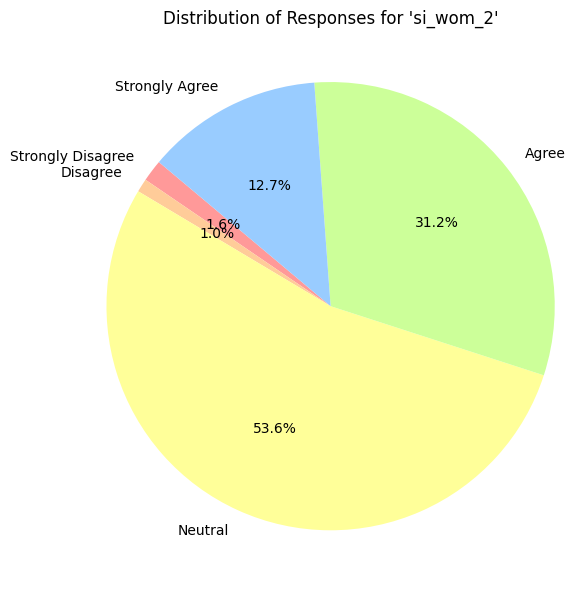

In [140]:
summarize_likert_responses(df, 'si_wom_2')

During a crisis, Social media platforms, influencers, and online communities influence my online purchase decisions.


Summary for column: si_social_media_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   21        2.55      
Disagree            54        6.55      
Neutral             397       48.12     
Agree               209       25.33     
Strongly Agree      144       17.45     


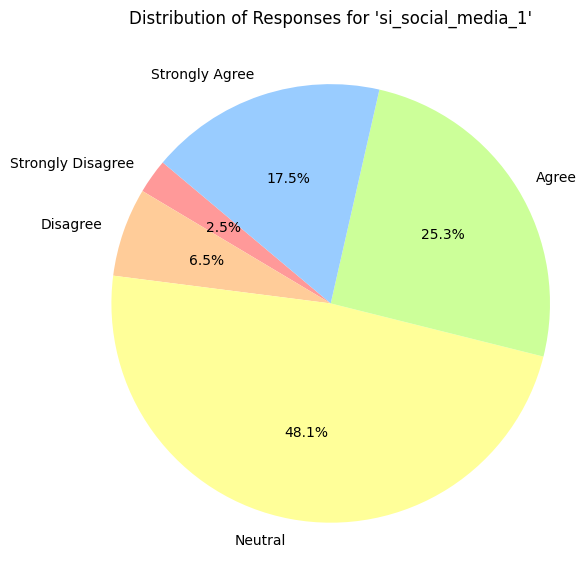

In [141]:
summarize_likert_responses(df, 'si_social_media_1')

I am likely to make online purchases during a crisis based on what I see or learn from social media platforms.


Summary for column: si_social_media_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   10        1.21      
Disagree            58        7.03      
Neutral             435       52.73     
Agree               218       26.42     
Strongly Agree      104       12.61     


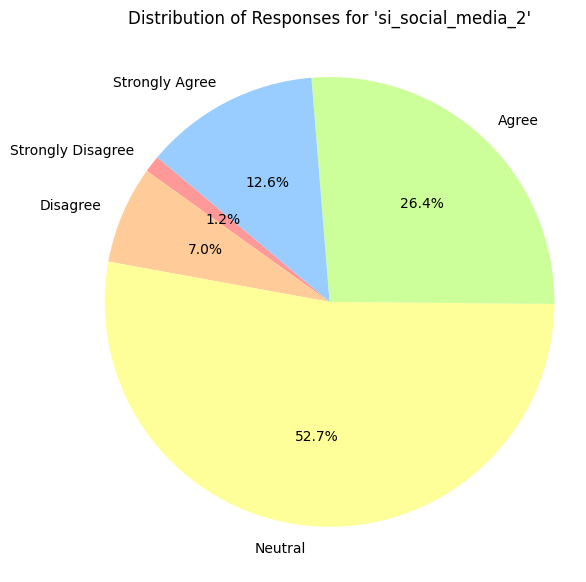

In [142]:
summarize_likert_responses(df, 'si_social_media_2')

I consider online reviews and ratings when making purchasing decisions during a crisis.


Summary for column: si_reviews_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   9         1.09      
Disagree            26        3.15      
Neutral             412       49.94     
Agree               230       27.88     
Strongly Agree      148       17.94     


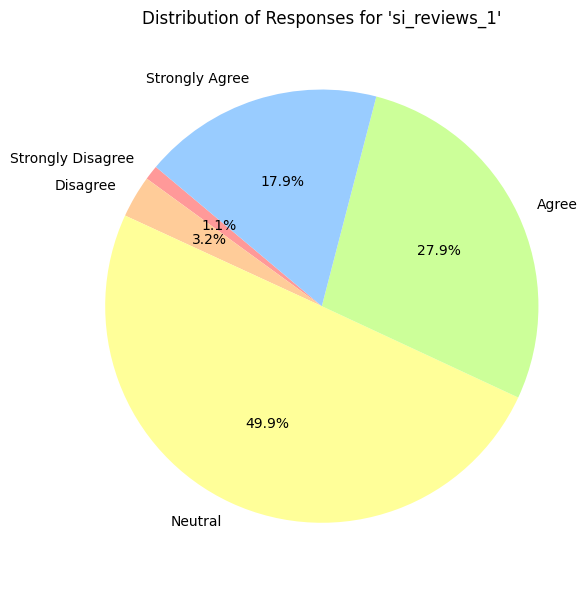

In [143]:
summarize_likert_responses(df, 'si_reviews_1')

Positive reviews and high ratings increase my confidence in making online purchases during a crisis


Summary for column: si_reviews_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   9         1.09      
Disagree            18        2.18      
Neutral             363       44.00     
Agree               209       25.33     
Strongly Agree      226       27.39     


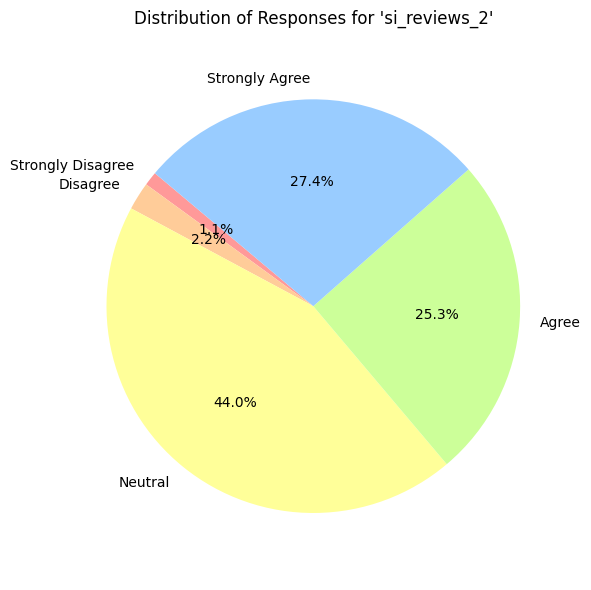

In [144]:
summarize_likert_responses(df, 'si_reviews_2')

Observing others making online purchases during a crisis influences my own intention to make similar purchases.


Summary for column: si_social_proof_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   15        1.82      
Disagree            48        5.82      
Neutral             454       55.03     
Agree               255       30.91     
Strongly Agree      53        6.42      


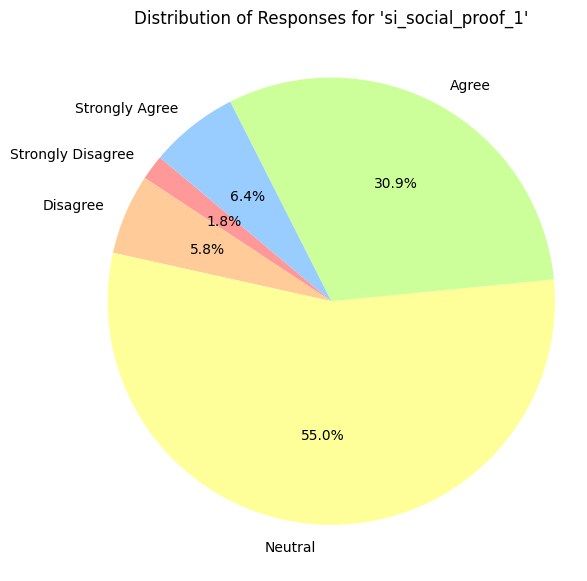

In [145]:
summarize_likert_responses(df, 'si_social_proof_1')

I am more likely to make online purchases during a crisis if I see others doing the same


Summary for column: si_social_proof_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   25        3.03      
Disagree            66        8.00      
Neutral             461       55.88     
Agree               224       27.15     
Strongly Agree      49        5.94      


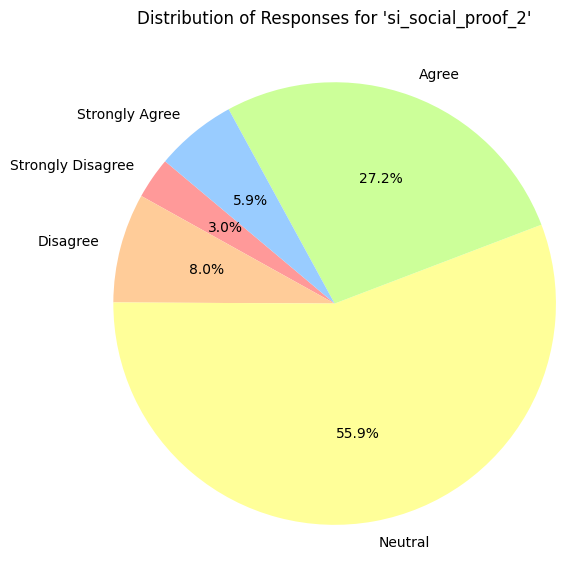

In [146]:
summarize_likert_responses(df, 'si_social_proof_2')

Social norms and expectations regarding online shopping during a crisis influence my own intention to make online purchases.


Summary for column: si_normative_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   18        2.18      
Disagree            69        8.36      
Neutral             519       62.91     
Agree               203       24.61     
Strongly Agree      16        1.94      


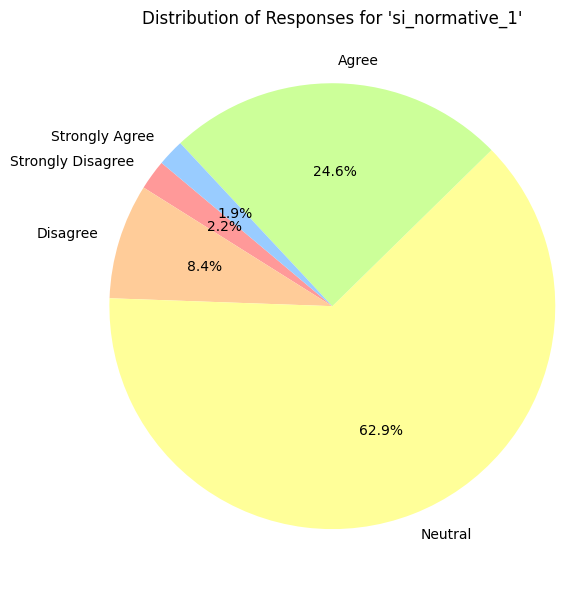

In [147]:
summarize_likert_responses(df, 'si_normative_1')

I feel pressure to make online purchases during a crisis due to the expectations of others.


Summary for column: si_normative_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   54        6.55      
Disagree            177       21.45     
Neutral             463       56.12     
Agree               107       12.97     
Strongly Agree      24        2.91      


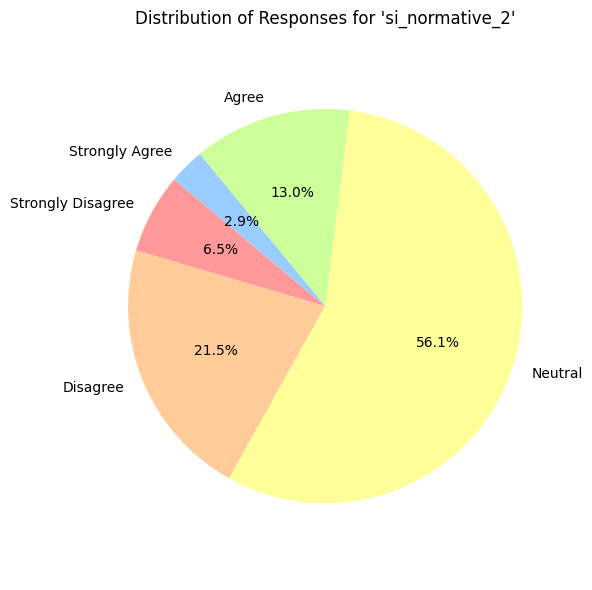

In [148]:
summarize_likert_responses(df, 'si_normative_2')

I am willing to share my own online shopping experiences, recommendations, or opinions with others during a crisis.


Summary for column: si_sharing_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   13        1.58      
Disagree            40        4.85      
Neutral             530       64.24     
Agree               176       21.33     
Strongly Agree      66        8.00      


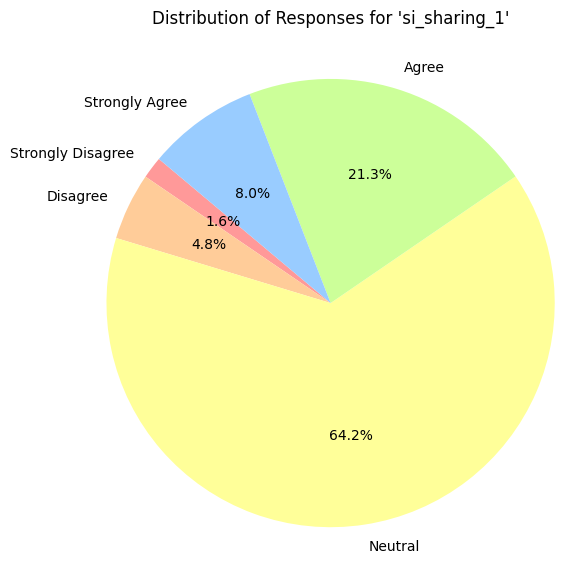

In [149]:
summarize_likert_responses(df, 'si_sharing_1')

Sharing information about my online purchases during a crisis is important for influencing others\' purchase decisions.


Summary for column: si_sharing_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   10        1.21      
Disagree            35        4.24      
Neutral             502       60.85     
Agree               219       26.55     
Strongly Agree      59        7.15      


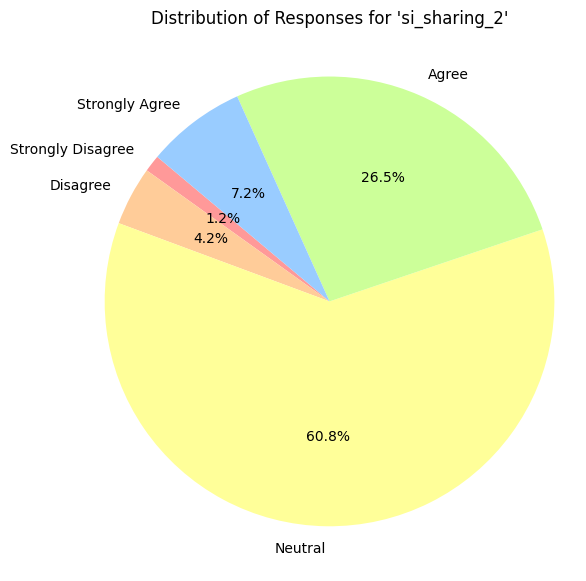

In [150]:
summarize_likert_responses(df, 'si_sharing_2')

# Attitude (ATT)

Overall, I have a positive attitude toward online shopping during a crisis.


Summary for column: att_positive_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   8         0.97      
Disagree            33        4.00      
Neutral             217       26.30     
Agree               401       48.61     
Strongly Agree      166       20.12     


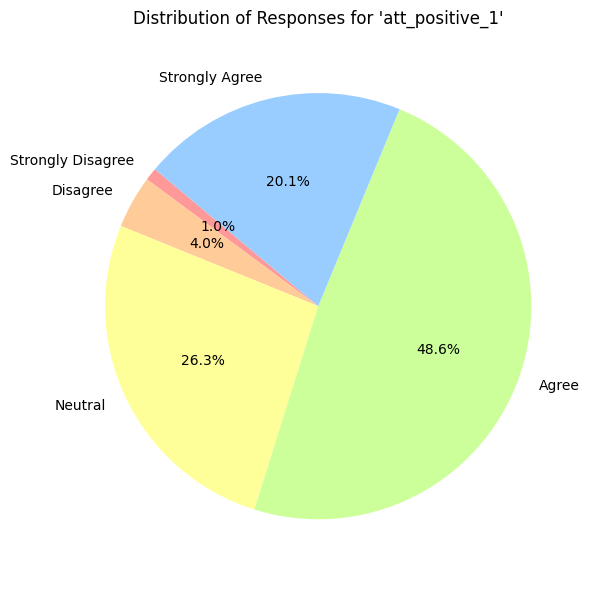

In [151]:
summarize_likert_responses(df, 'att_positive_1')

I believe that online shopping is a practical and efficient way to make purchases during a crisis.


Summary for column: att_positive_2

Response            Count     Percentage
----------------------------------------
Strongly Disagree   8         0.97      
Disagree            26        3.15      
Neutral             148       17.94     
Agree               520       63.03     
Strongly Agree      123       14.91     


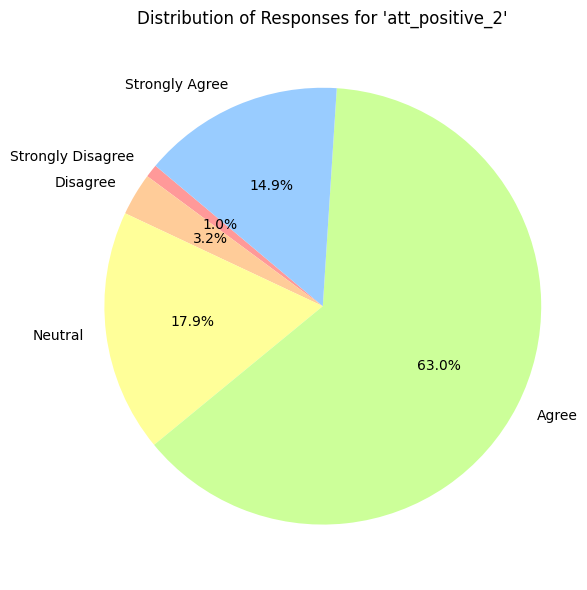

In [152]:
summarize_likert_responses(df, 'att_positive_2')

# Perceived Risk (RISK)

I am concerned about the security of my personal and financial information when shopping online during a crisis.


Summary for column: risk_security_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   6         0.73      
Disagree            59        7.15      
Neutral             102       12.36     
Agree               447       54.18     
Strongly Agree      211       25.58     


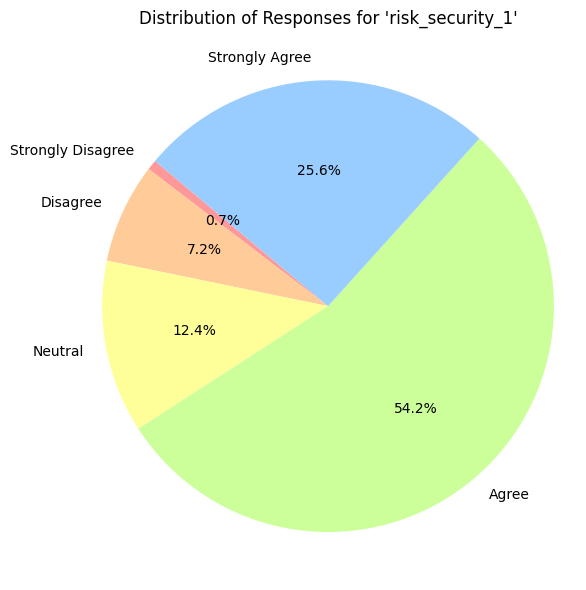

In [153]:
summarize_likert_responses(df, 'risk_security_1')

I am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.


Summary for column: risk_authenticity_1

Response            Count     Percentage
----------------------------------------
Strongly Disagree   7         0.85      
Disagree            49        5.94      
Neutral             191       23.15     
Agree               447       54.18     
Strongly Agree      131       15.88     


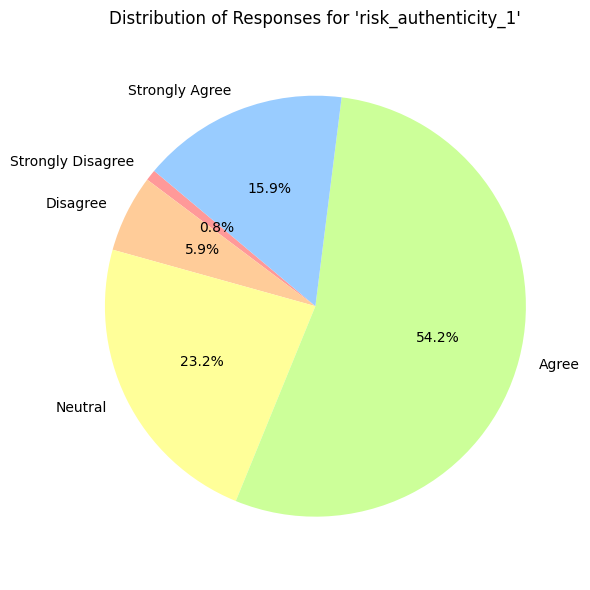

In [154]:
summarize_likert_responses(df, 'risk_authenticity_1')

 # Online Purchase Intention (OPI)

57.online purchases during crisis time?

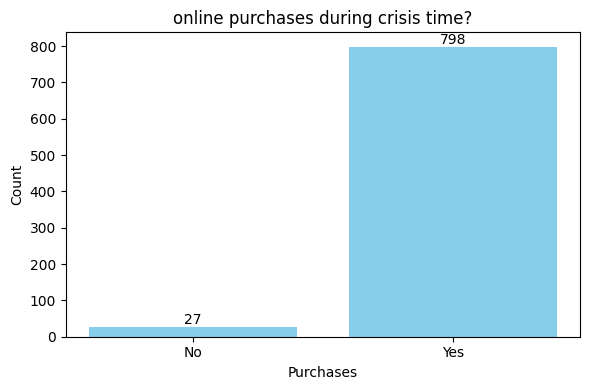

In [ ]:
def plot_OPI(df):
    """
    Plots the distribution of encoded gender values from the given DataFrame,
    and displays the exact count on top of each bar.
    Assumes 'opi_purchased?' column contains:
        0 - Male
        1 - Female
        2 - Prefer not to Say
    """
    if 'opi_purchased?' not in df.columns:
        print("Error: 'opi_purchased?' column not found in the DataFrame.")
        return

    # Get value counts sorted by index (to maintain label order)
    counts = df['opi_purchased?'].value_counts().sort_index()
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot bar chart
    bars = ax.bar(counts.index, counts.values, color='skyblue')
    
    # Set titles and labels
    ax.set_title("online purchases during crisis time?")
    ax.set_xlabel("Purchases")
    ax.set_ylabel("Count")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No", "Yes"])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height, int(height), 
                ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_OPI(df)


58.Overall, I am satisfied with online purchase during a crisis?


Summary for column: opi_satisfaction

Response            Count     Percentage
----------------------------------------
Strongly Disagree   5         0.61      
Disagree            68        8.24      
Neutral             175       21.21     
Agree               463       56.12     
Strongly Agree      114       13.82     


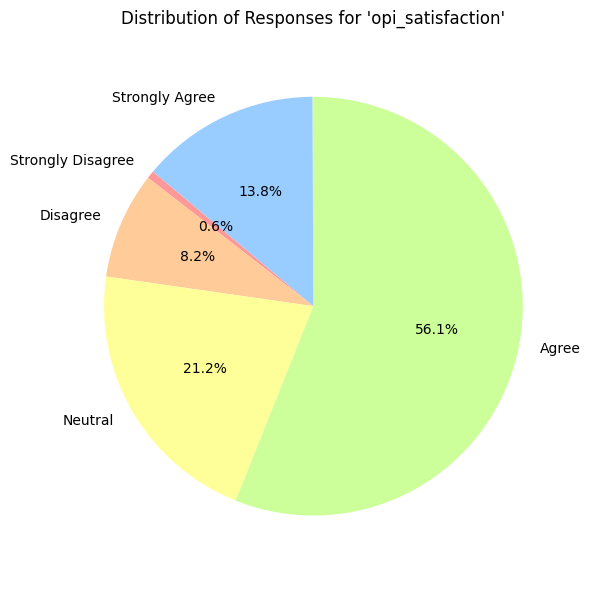

In [156]:
summarize_likert_responses(df, 'opi_satisfaction')

59.Changed my online shopping behavior during a crisis compared to non-crisis periods?


Summary for column: opi_behavior_change

Response            Count     Percentage
----------------------------------------
Strongly Disagree   8         0.97      
Disagree            20        2.42      
Neutral             145       17.58     
Agree               522       63.27     
Strongly Agree      130       15.76     


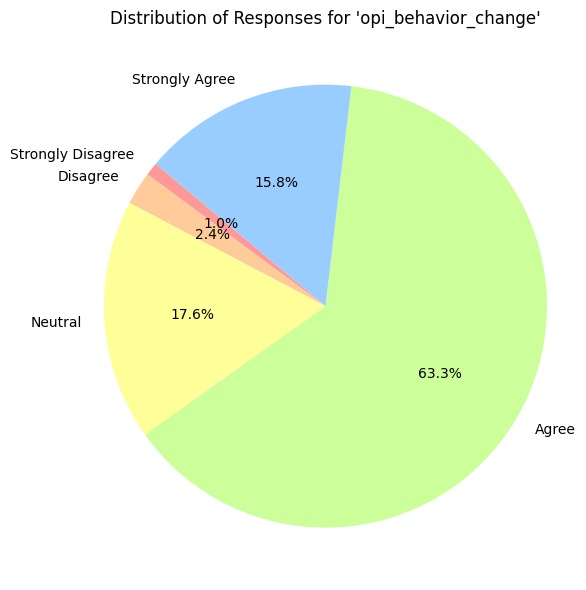

In [157]:
summarize_likert_responses(df, 'opi_behavior_change')

60.Convenience of online shopping during crisis vs. traditional shopping.. 

It was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.


Summary for column: opi_convenience

Response            Count     Percentage
----------------------------------------
Strongly Disagree   7         0.85      
Disagree            18        2.18      
Neutral             201       24.36     
Agree               473       57.33     
Strongly Agree      126       15.27     


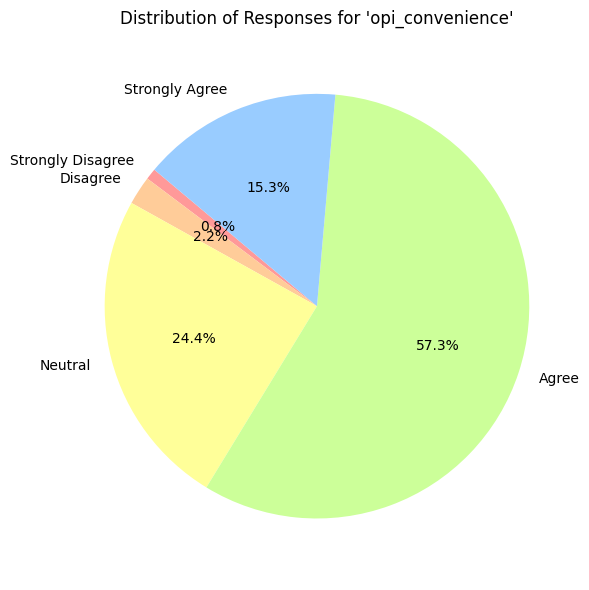

In [158]:
summarize_likert_responses(df, 'opi_convenience')

61.Better value for money in online shopping during crisis,

I believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.


Summary for column: opi_value

Response            Count     Percentage
----------------------------------------
Strongly Disagree   7         0.85      
Disagree            38        4.61      
Neutral             192       23.27     
Agree               480       58.18     
Strongly Agree      108       13.09     


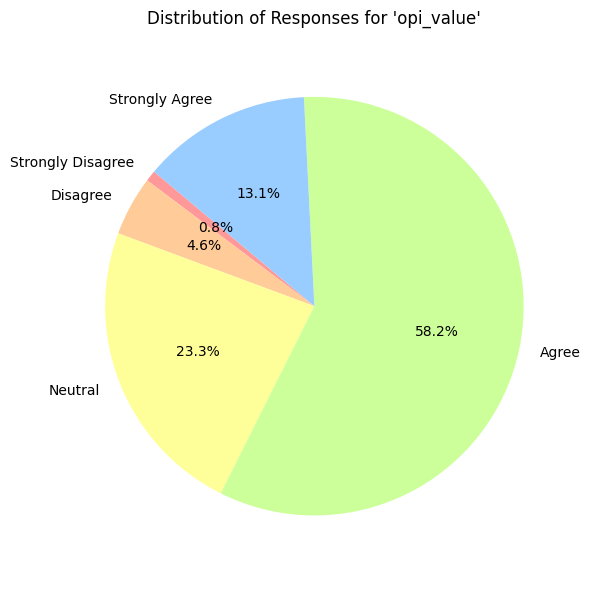

In [159]:
summarize_likert_responses(df, 'opi_value')